# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2023
## Домашнее задание 4. Линейные модели
### Дедлайн --- 4 декабря 2023 23:59

In [1]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=11oDZ6JvJS0xP_u_YE55IFoX1C8TzDKQB

zsh:1: /opt/homebrew/bin/pip: bad interpreter: /opt/homebrew/opt/python@3.10/bin/python3.10: no such file or directory
zsh:1: no matches found: https://drive.google.com/uc?id=11oDZ6JvJS0xP_u_YE55IFoX1C8TzDKQB


In [52]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(font_scale=1.4, style='whitegrid')
%config InlineBackend.figure_format='retina'

В учебных целях в первой задаче запрещено использовать готовые реализации линейной регрессии (например, из пакета *scikit-learn*).

## Задача 1 (10 баллов)

На полигоне испытывается новая модель трамвая. В одном из испытании работы двигателя проверяется, что движение трамвая равномерно. Для проведения теста на трамвай установлен датчик, посекундно измеряющий пройденное расстояние.

Записи датчика можно описать такой моделью:

 $$X_i = \beta_1+i\beta_2+\varepsilon_0+\ldots+\varepsilon_i,\, i= 0, 1, \ldots, n$$

где $X_i$ --- расстояние, которое проехал трамвай за $i$ секунд. В модели $\beta_1$ --- начальное расстояние, $\beta_2$ --- скорость трамвая, $\varepsilon_0$ --- ошибка начального показания датчика. Отсчет времени идет от предыдущего замера, причем отсчет происходит с ошибкой. Для $i = 1, \ldots, n$ величина $\varepsilon_i$ есть ошибка приращения расстояния, то есть $\varepsilon_i = \varepsilon_i^t \beta_2,$ где $\varepsilon_i^t$ --- ошибка отсчета времени. Все ошибки $\varepsilon_i$ независимы и распределены по закону $N(0, \sigma^2)$.

Сведите задачу к линейной модели и найдите оценки наименьших квадратов для начального расстояния $\beta_1$ и скорости $\beta_2,$ а также несмещенную оценку для $\sigma^2,$ из которой выразите оценку дисперсии отсчета времени.

Данные возьмите из файла Regression.csv. Сделайте выводы.

### Решение

Загрузим датасет, содержащий показания датчика.

In [53]:
# !pip install -q gdown
# !gdown https://drive.google.com/uc?id=1gmSof1yxWt009QoBiKjwkLMlcpn3r61W

In [54]:
X = np.genfromtxt('regression.csv')
print('Размер датасета:', X.shape)
print('Средняя скорость:', X[-1] / X.shape[0])

Размер датасета: (1000,)
Средняя скорость: 12.0408175


Датасет состоит из 1000 измерений. По смыслу средняя скорость имеет размерность метры в секунду.

In [55]:
from scipy import integrate
def f(x):
  return np.exp(x)*(x**2)
v, err = integrate.quad(f, -1, 1, points=[0])
v,err

(0.8788846226018336, 9.75757944001547e-15)

Визуализируйте выборку и сделайте выводы о том, верно ли что линейная регрессионная модель имеет смысл

Text(0.5, 0, 'время')

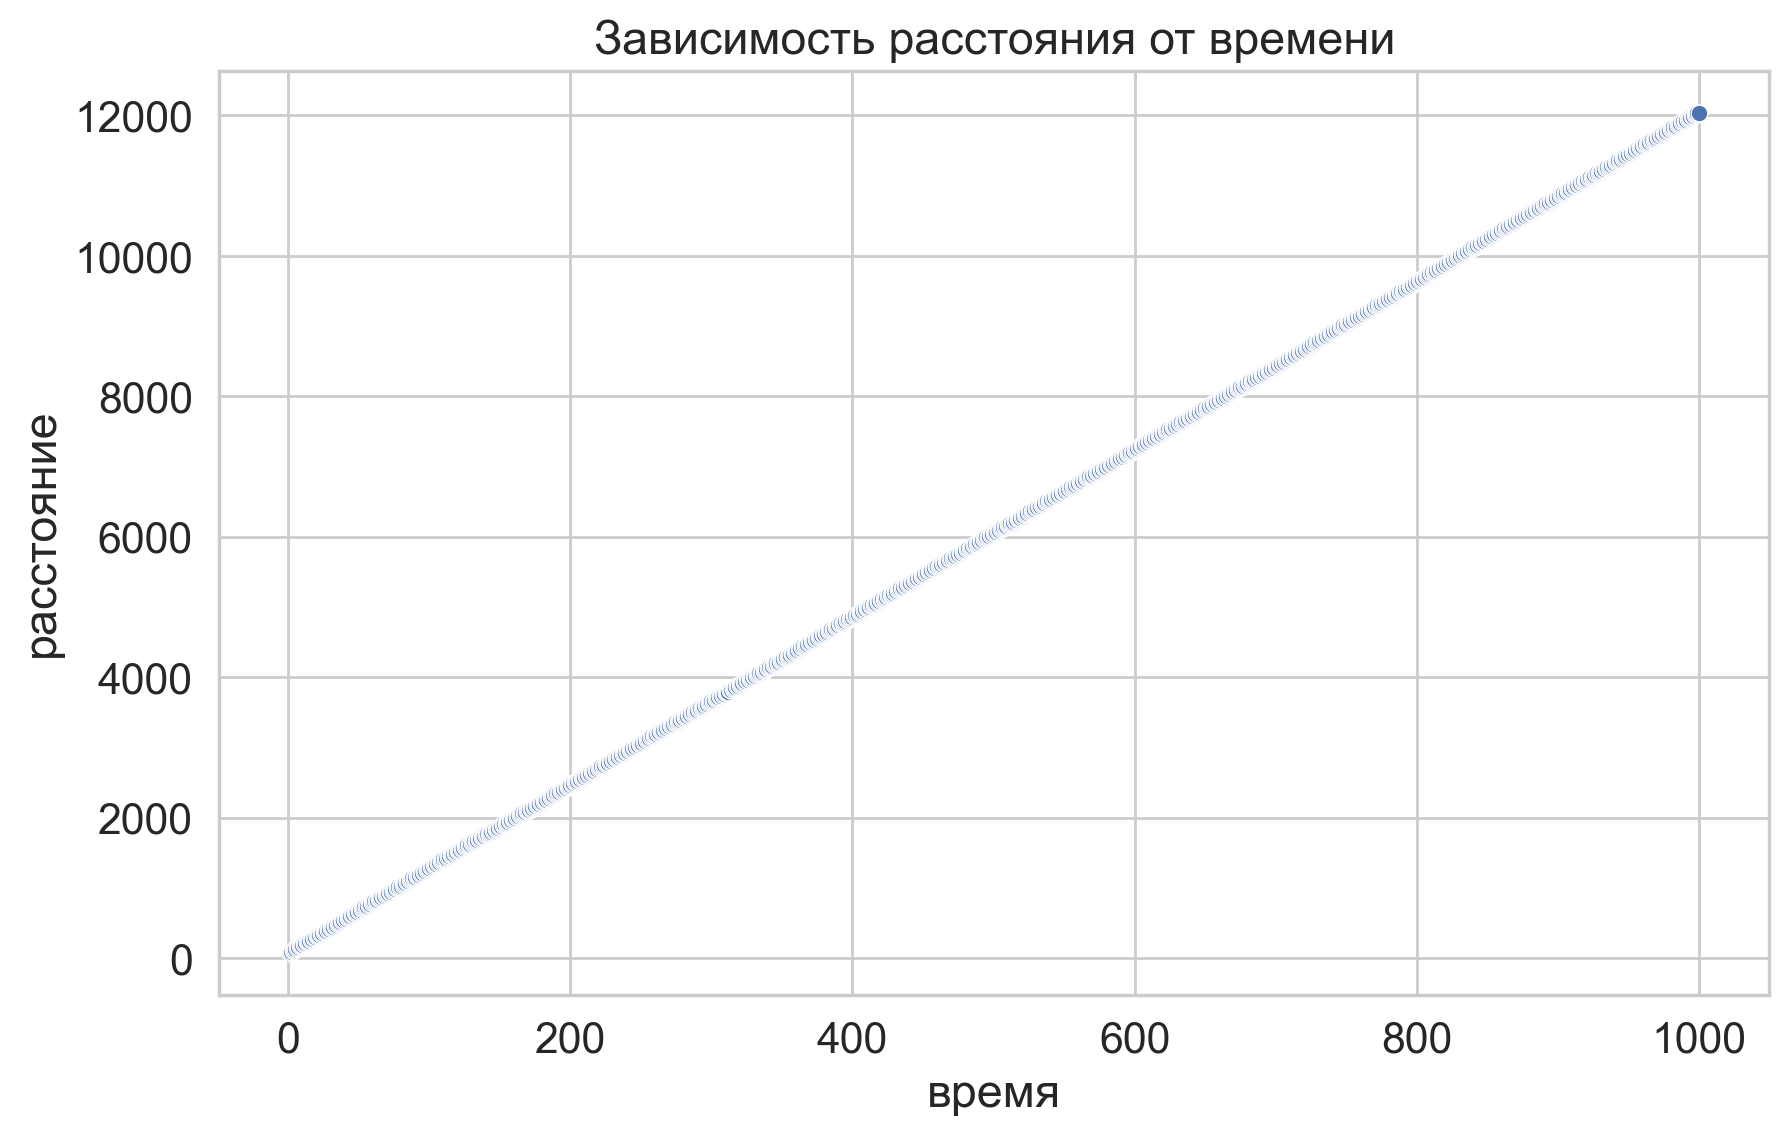

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.arange(X.size) + 1, y=X)
plt.title("Зависимость расстояния от времени")
plt.ylabel("расстояние")
plt.xlabel("время")

График линейный, а значит линейная регрессия имеет смысл.

#### 1. Сведите задачу к гауссовской линейной модели (определения брать из основного курса)

$$ Y = 
\left(\begin{array}{cc} 
X_0\\
X_1-X_0\\
X_2-X_1\\
\dots\\
X_n  -  X_{n - 1}\\
\end{array} \right) = 
\left(\begin{array}{cc} 
\beta_1+\varepsilon_0\\
\beta_2+\varepsilon_1\\
\beta_2+\varepsilon_2\\
\dots\\
\beta_2 + \varepsilon_n\\
\end{array} \right)
$$

$$\varepsilon \sim \mathcal{N}(0, \sigma^2)$$.

In [58]:
X_down = np.roll(X, 1)
X_down[0] = 0

In [59]:
Y = X - X_down

#### 2. Распишите и проверьте требования к гауссовской линейной модели

Рекомендуется писать некоторое требование теоретически, описать способ его проверки и визуализировать проверяемые величины (мат. ожидания, дисперсии, зависимости).

В рамках этого задания наличие зависимости можно проверять исключительно визуально. Если у Вас есть желание разобраться самостоятельно в критериях независимости и коэффициентах корреляции, это поощряется (но не требуется)

$X$ можно представить в виде $X = a + \varepsilon$, где $a$ --- случайный вектор, $\varepsilon$ --- случайный вектор(ошибка). При этом значение ошибки в среднем равно 0 + в нашем случае ошибки будут иметь одинаковую дисперсию.

<Figure size 1200x400 with 0 Axes>

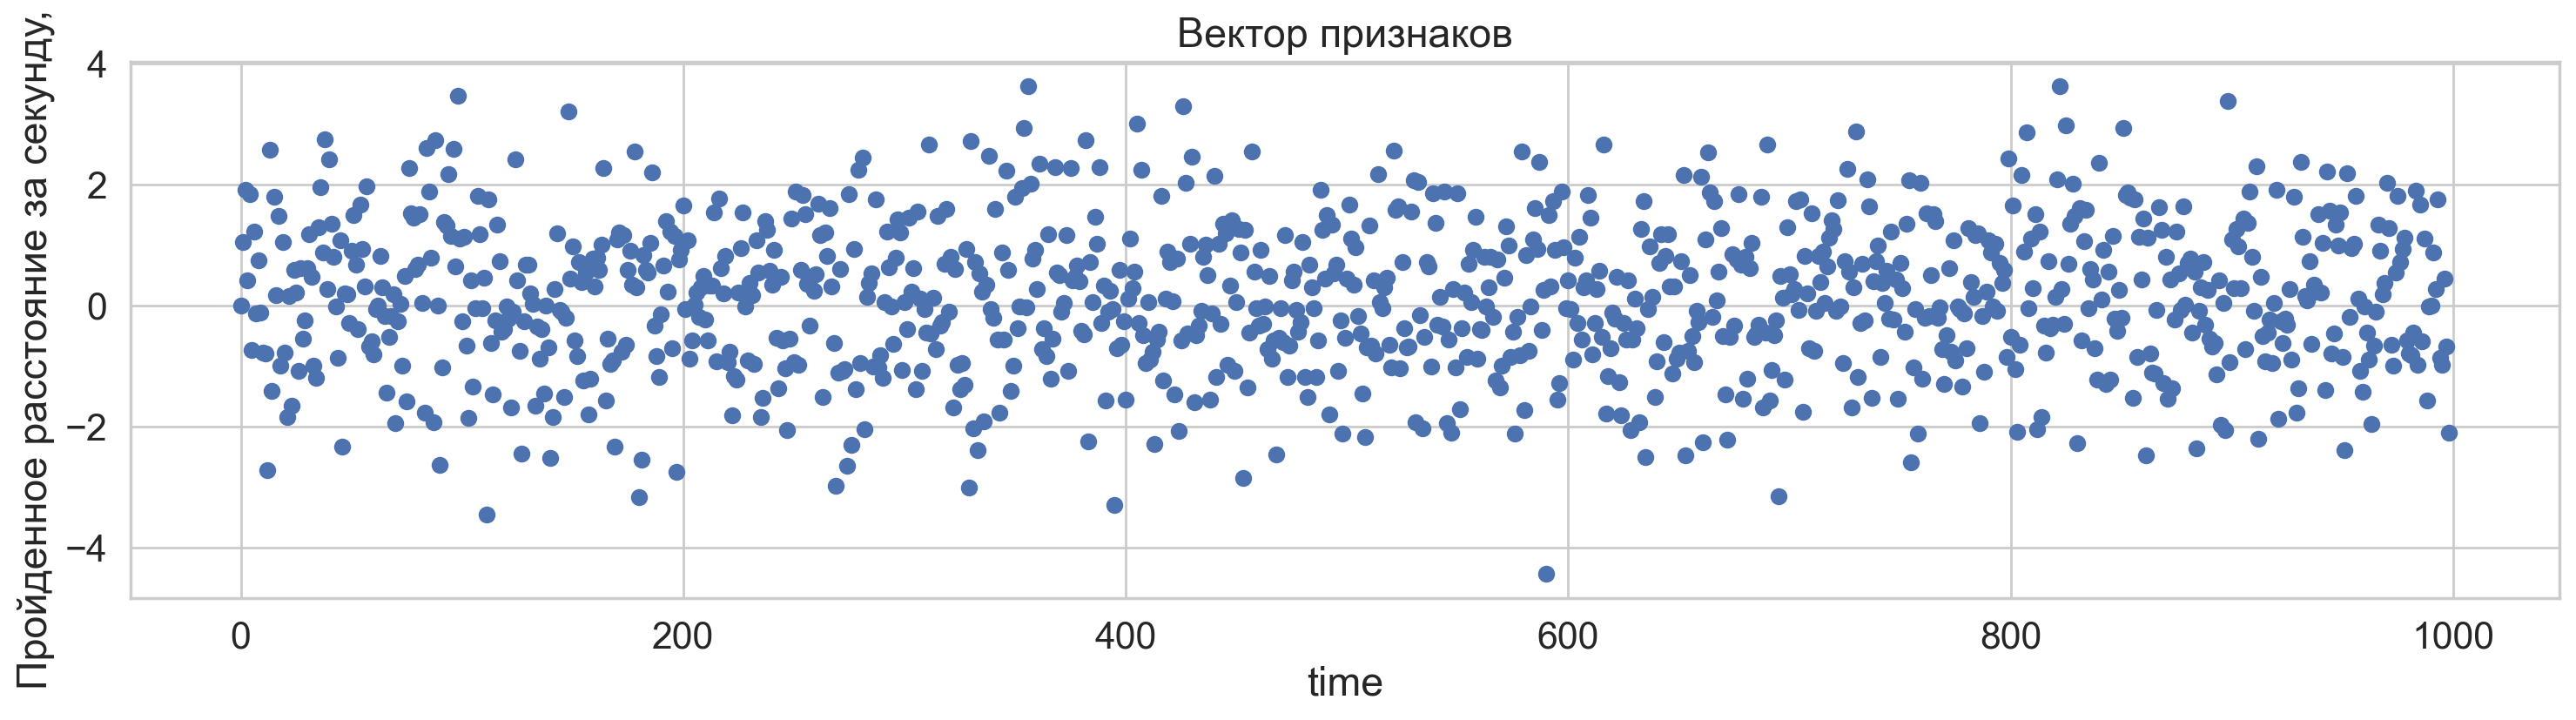

In [60]:
plt.figure(figsize=(12, 4))
time = np.arange(Y.shape[0] - 1)
plt.figure(figsize=(18,4))
plt.xlabel("time")
plt.ylabel("Пройденное расстояние за секунду, м")
plt.scatter(time, Y[1:] - Y[1], label="Показания датчика")
plt.title("Вектор признаков")
plt.show()

Проверьте, что ошибка нормальна. Для этого можно использовать QQ-plot. Если хотите, можете использовать критерии нормальности

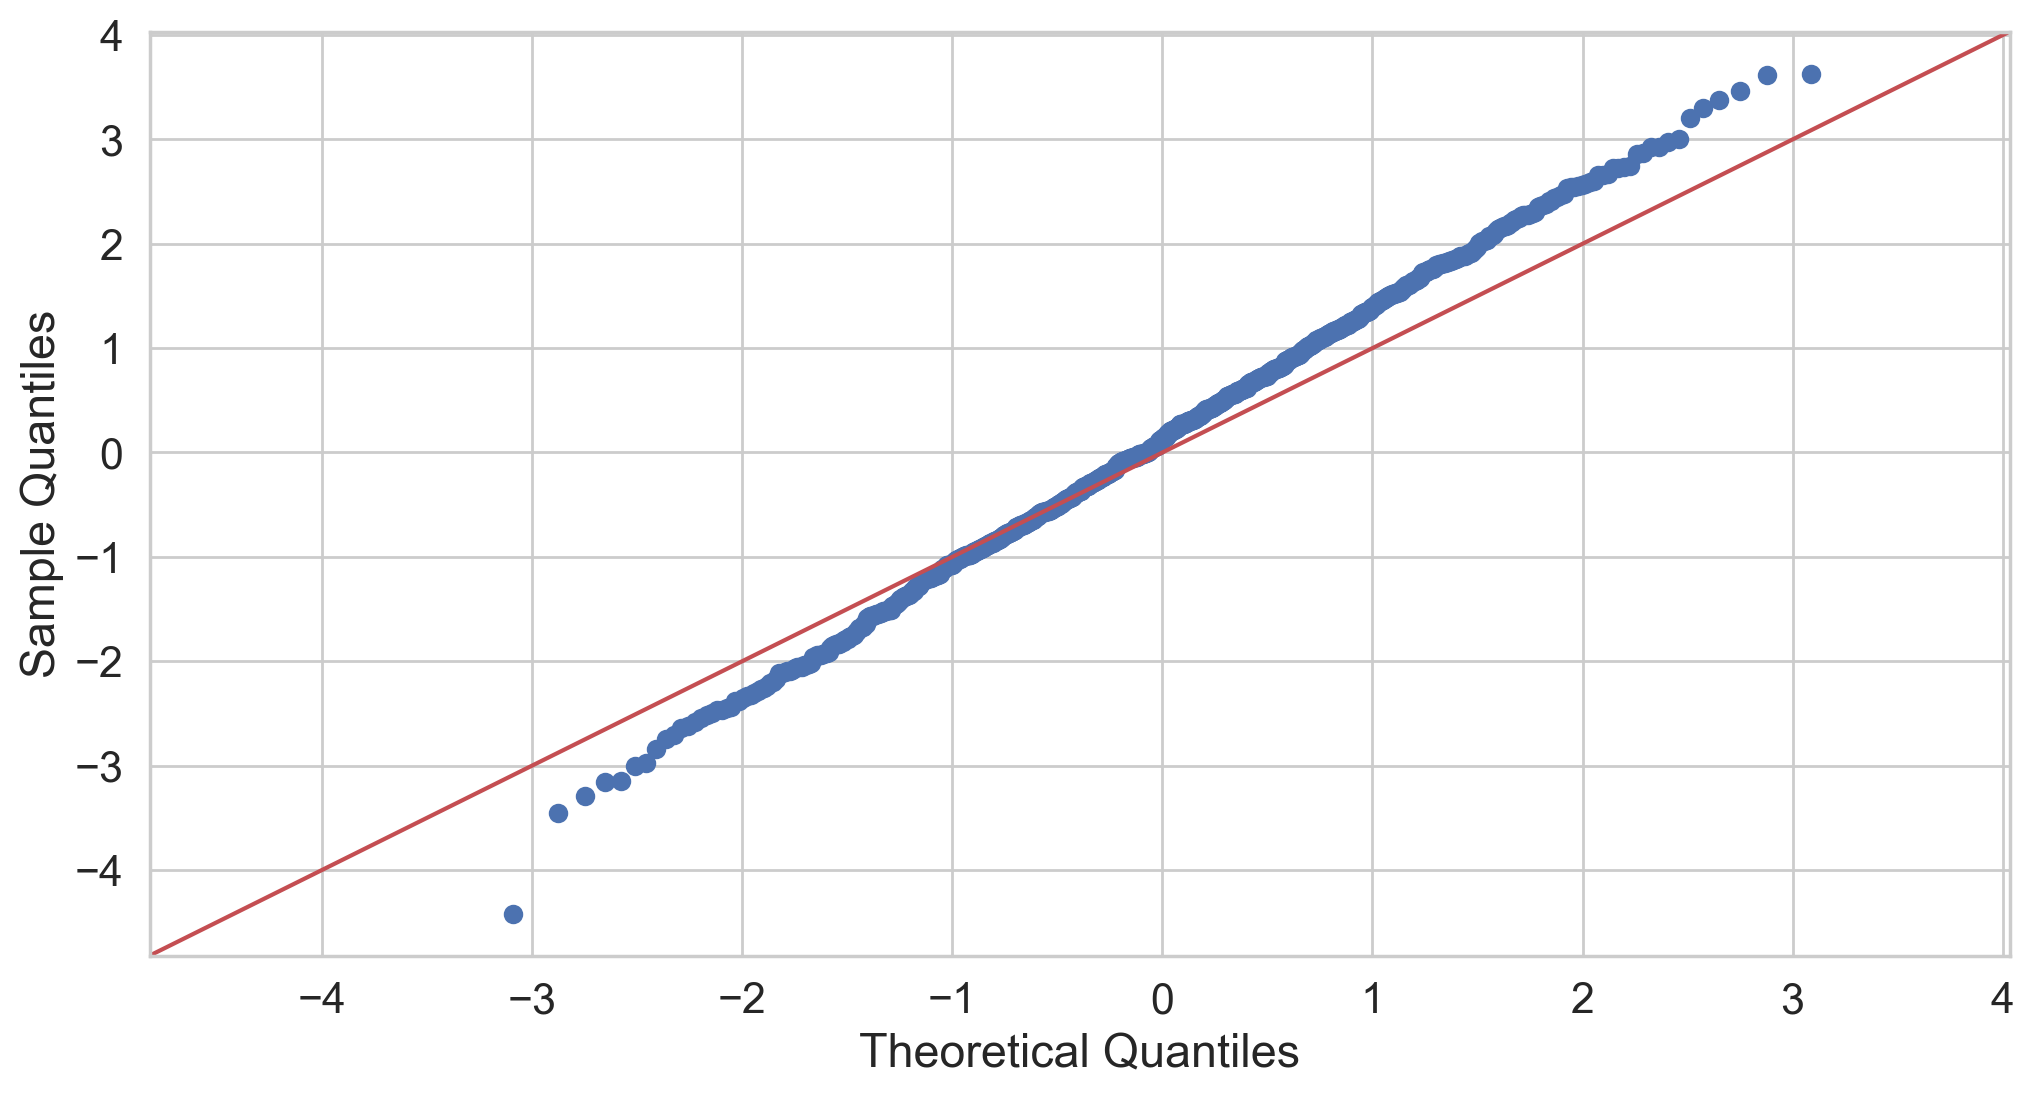

In [61]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(12, 6))
sm.qqplot(Y[1:] - Y[1], line='45', ax=ax)
plt.show()

**Промежуточный вывод:**

Матожидание = 0, дисперсия >= 1

Видно, что slope линии, по которому выстроена выборка ошибки >= 0 и как мы видим, все ошибки имеют нормальное распределление.

#### 3. Найдите оценку параметров

Укажите, чему равна матрица (Z в терминах методички) в задаче:

И найдите параметры $\beta_1$, $\beta_2$

$Z = 
\left(\begin{array}{cc} 
1 & 0 \\
0 & 1 \\
\dots & \dots\\
0 & 1 \\
\end{array}\right)$


Линейная модель: $Y = Z\theta + \varepsilon$.

In [62]:
Z = np.array([1, 0]+[0, 1]*(Y.shape[0]-1)).reshape((Y.shape[0],2))
theta_hat = np.matmul(np.matmul(np.linalg.inv(np.matmul(Z.T, Z)), Z.T), Y)
theta_hat

array([82.0053    , 11.97078298])

Проверьте, насколько точна модель при помощи подсчёта ошибок. Выведите сами ошибки на график и проанализируйте его.

Бонусная часть (+5 баллов):

Возможно измерения в задаче содержат разные аномалии, что плохо скажется на оценке наименьших квадратов. Попробуйте применить знания из предыдущей домашки о робастных оценках и построить оценку с BP выше нуля. Такие методы называются "робастной регрессией", но определение M-оценки в них то же, что и в обычной робастной статистике.

#### 4. Оцените дисперсию ошибки показаний датчика.

Найдите оценку дисперсии $\sigma^2$ показаний датчика $\varepsilon$ (ошибки регрессионной модели). После того, как она найдена, найдите оценку дисперсии $\sigma^2$ ошибки отсчёта времени $\varepsilon^t$ (исходной ошибки).

$$\dfrac{1}{n-k}||Y - Z\hat{\theta}||_2^2$$. Тогда k = 2. n - число измерений. Оценка несмещенная.

In [63]:
proj = Y-np.matmul(Z,theta_hat)
sigma_hat = np.sum(np.square(proj))/998.0
print(f"оценка модели: {sigma_hat :.5}")

оценка модели: 1.5252


In [64]:
print(f"Оценка дисперсии ошибки отсчёта времени: {sigma_hat/np.square(theta_hat[1]) :.5}")

Оценка дисперсии ошибки отсчёта времени: 0.010644


#### 5. Измерьте качество модели

В качестве метрики качества модели, эксперты предложили использовать [коэффициент детерминанции](https://ru.wikipedia.org/wiki/Коэффициент_детерминации). Он показывает какую долю дисперсии выборки объясняет линейная регрессия. В нашем случае, значение $R^2 > 0.98$ будет означать, что трамвай прошел испытание.

Изучите что такое коэффициент детерминации и сделайте выводы о том, почему большой коэффициент говорит о высоком качестве модели

Ответ:

In [65]:
from sklearn.metrics import r2_score

r2_score(Y, np.matmul(Z, theta_hat))

0.7629764560832567

In [66]:
r2_score(X, theta_hat[0] + theta_hat[1] * (np.arange(Y.shape[0]) + 1))

0.9999680124927224

In [67]:
res = np.array([theta_hat[0]+theta_hat[1]*np.arange(X.shape[0])-X])
var = np.square(X-np.mean(X))
R = 1 - np.sum(np.square(res))/np.sum(var)
print("R^2=",R)

R^2= 0.9999894515651776


Как мы видим, $R^2 > 0.98$, а значит трамвай прошел испытания.

Как альтернатива коэффициенту детерминации есть коэффициенты AIC (https://en.wikipedia.org/wiki/Akaike_information_criterion) и BIC (https://en.wikipedia.org/wiki/Bayesian_information_criterion). Найдите их и проинтерпретируйте их значения.

## Задача 2 (5 баллов)

Непараметрическая регрессия и метод Надарая-Ватсона.

Иногда вытаскивать информативные признаки из данных сложно, а регрессию делать хочется. Тогда можно построить нечто похожее на ядерную оценку плотности, но для регрессионной задачи. Она основана на вычислении значения в новой точке по значениям в соседних точках (похожее Вы видели на курсе машинного обучения, но для классификации и без статистики).

Изучите формулу Надарая-Ватсона из статьи на википедии: https://en.wikipedia.org/wiki/Kernel_regression

1) Сгенерируйте выборку для линейной регрессии руками (использовать реальные данные может быть нецелесообразно из-за проблем с визуализацией результата и проклятия размерностей).

Пусть в модели будет одна фича x и по ней вычисляется отклик y = ax + b + $\epsilon$, где ошибка независима и нормальна, а параметры выберите сами.

Сгенерируйте тестовую выборку тем же способом и посчитайте отклик из формулы Надарая-Ватсона для хотя бы трёх разных ядер (примеры ядер: https://en.wikipedia.org/wiki/Kernel_(statistics)). Сравните ошибки.

Визуализируйте Ваши предсказания (постройте кривую предсказаний по сетке x с шагом 0.01)

Заметим, что мы нигде не оценивали сами параметры, но смогли решить финальную задачу -- предсказывать y по x.

А теперь поймём что для этого не нужна линейность.

Проделайте рассуждения выше для нелинейных зависимостей ($y = sin(kx), y = log(x), y = x^k$. Постройте графики предсказаний и сравните их с истинными функциями.

**Вывод:**

Можете попробовать применить метод Надарая-Ватсона для выборки из задачи 3 и посмотреть, что получится (0 баллов)

## Задача 3 (15 баллов)

Теперь давайте попрактикуемся в решении задач на реальных данных. Мы будем анализировать рынок недвижимости 🏘. Данные возьмем из [соревнования](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) на платформе kaggle. В отличие от соревнований нас будут интересовать зависимости в данных, а не более точные предсказания.

![](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png).

В частности мы будем смотреть на влияние различных признаков на стоимость дома и проверим несколько гипотез.

In [68]:
from scipy import stats as sps

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [69]:
df = pd.read_csv("train.csv")

df.fillna("NA", inplace=True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


Можно заметить, что в данных присутствуют категориальные признаки, которые при этом не лишены порядка.

Вспомните курс машинного обучения. Как можно обработать категориальные призаки, чтобы регрессионная модель была осмысленна?

Ответ:

In [70]:
useful_columns = [
    "OverallQual", "GrLivArea", "ExterQual",
    "KitchenQual","GarageArea","PoolArea",
    "BsmtQual","TotalBsmtSF","GarageFinish","SalePrice"
]

filtered_df = df[useful_columns]

transforms = {
    "ExterQual": {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
    "GarageFinish": {"NA": 0, "Unf": 1, "RFn": 2, "Fin": 3},
    "BsmtQual": {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
    "KitchenQual": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
}

for i, j in transforms.items():
    filtered_df[i] = filtered_df[i].apply(lambda x: j[x])

### Визуализируйте данные

Перед тем, как начать использовать линейные модели необходимо убедиться в том, что столбцы признаков не слишком коллинеарны. Для этого можно использовать корреляцию Пирсона. Используя ``sns.heatmap`` постройте "тепловую карту" попарных корреляций признаков. Для того, чтобы увидеть числовые значения корреляций используйте ``annot=True``. Сделайте размер графика алекватным, например, ``figsize=(11, 10)``.

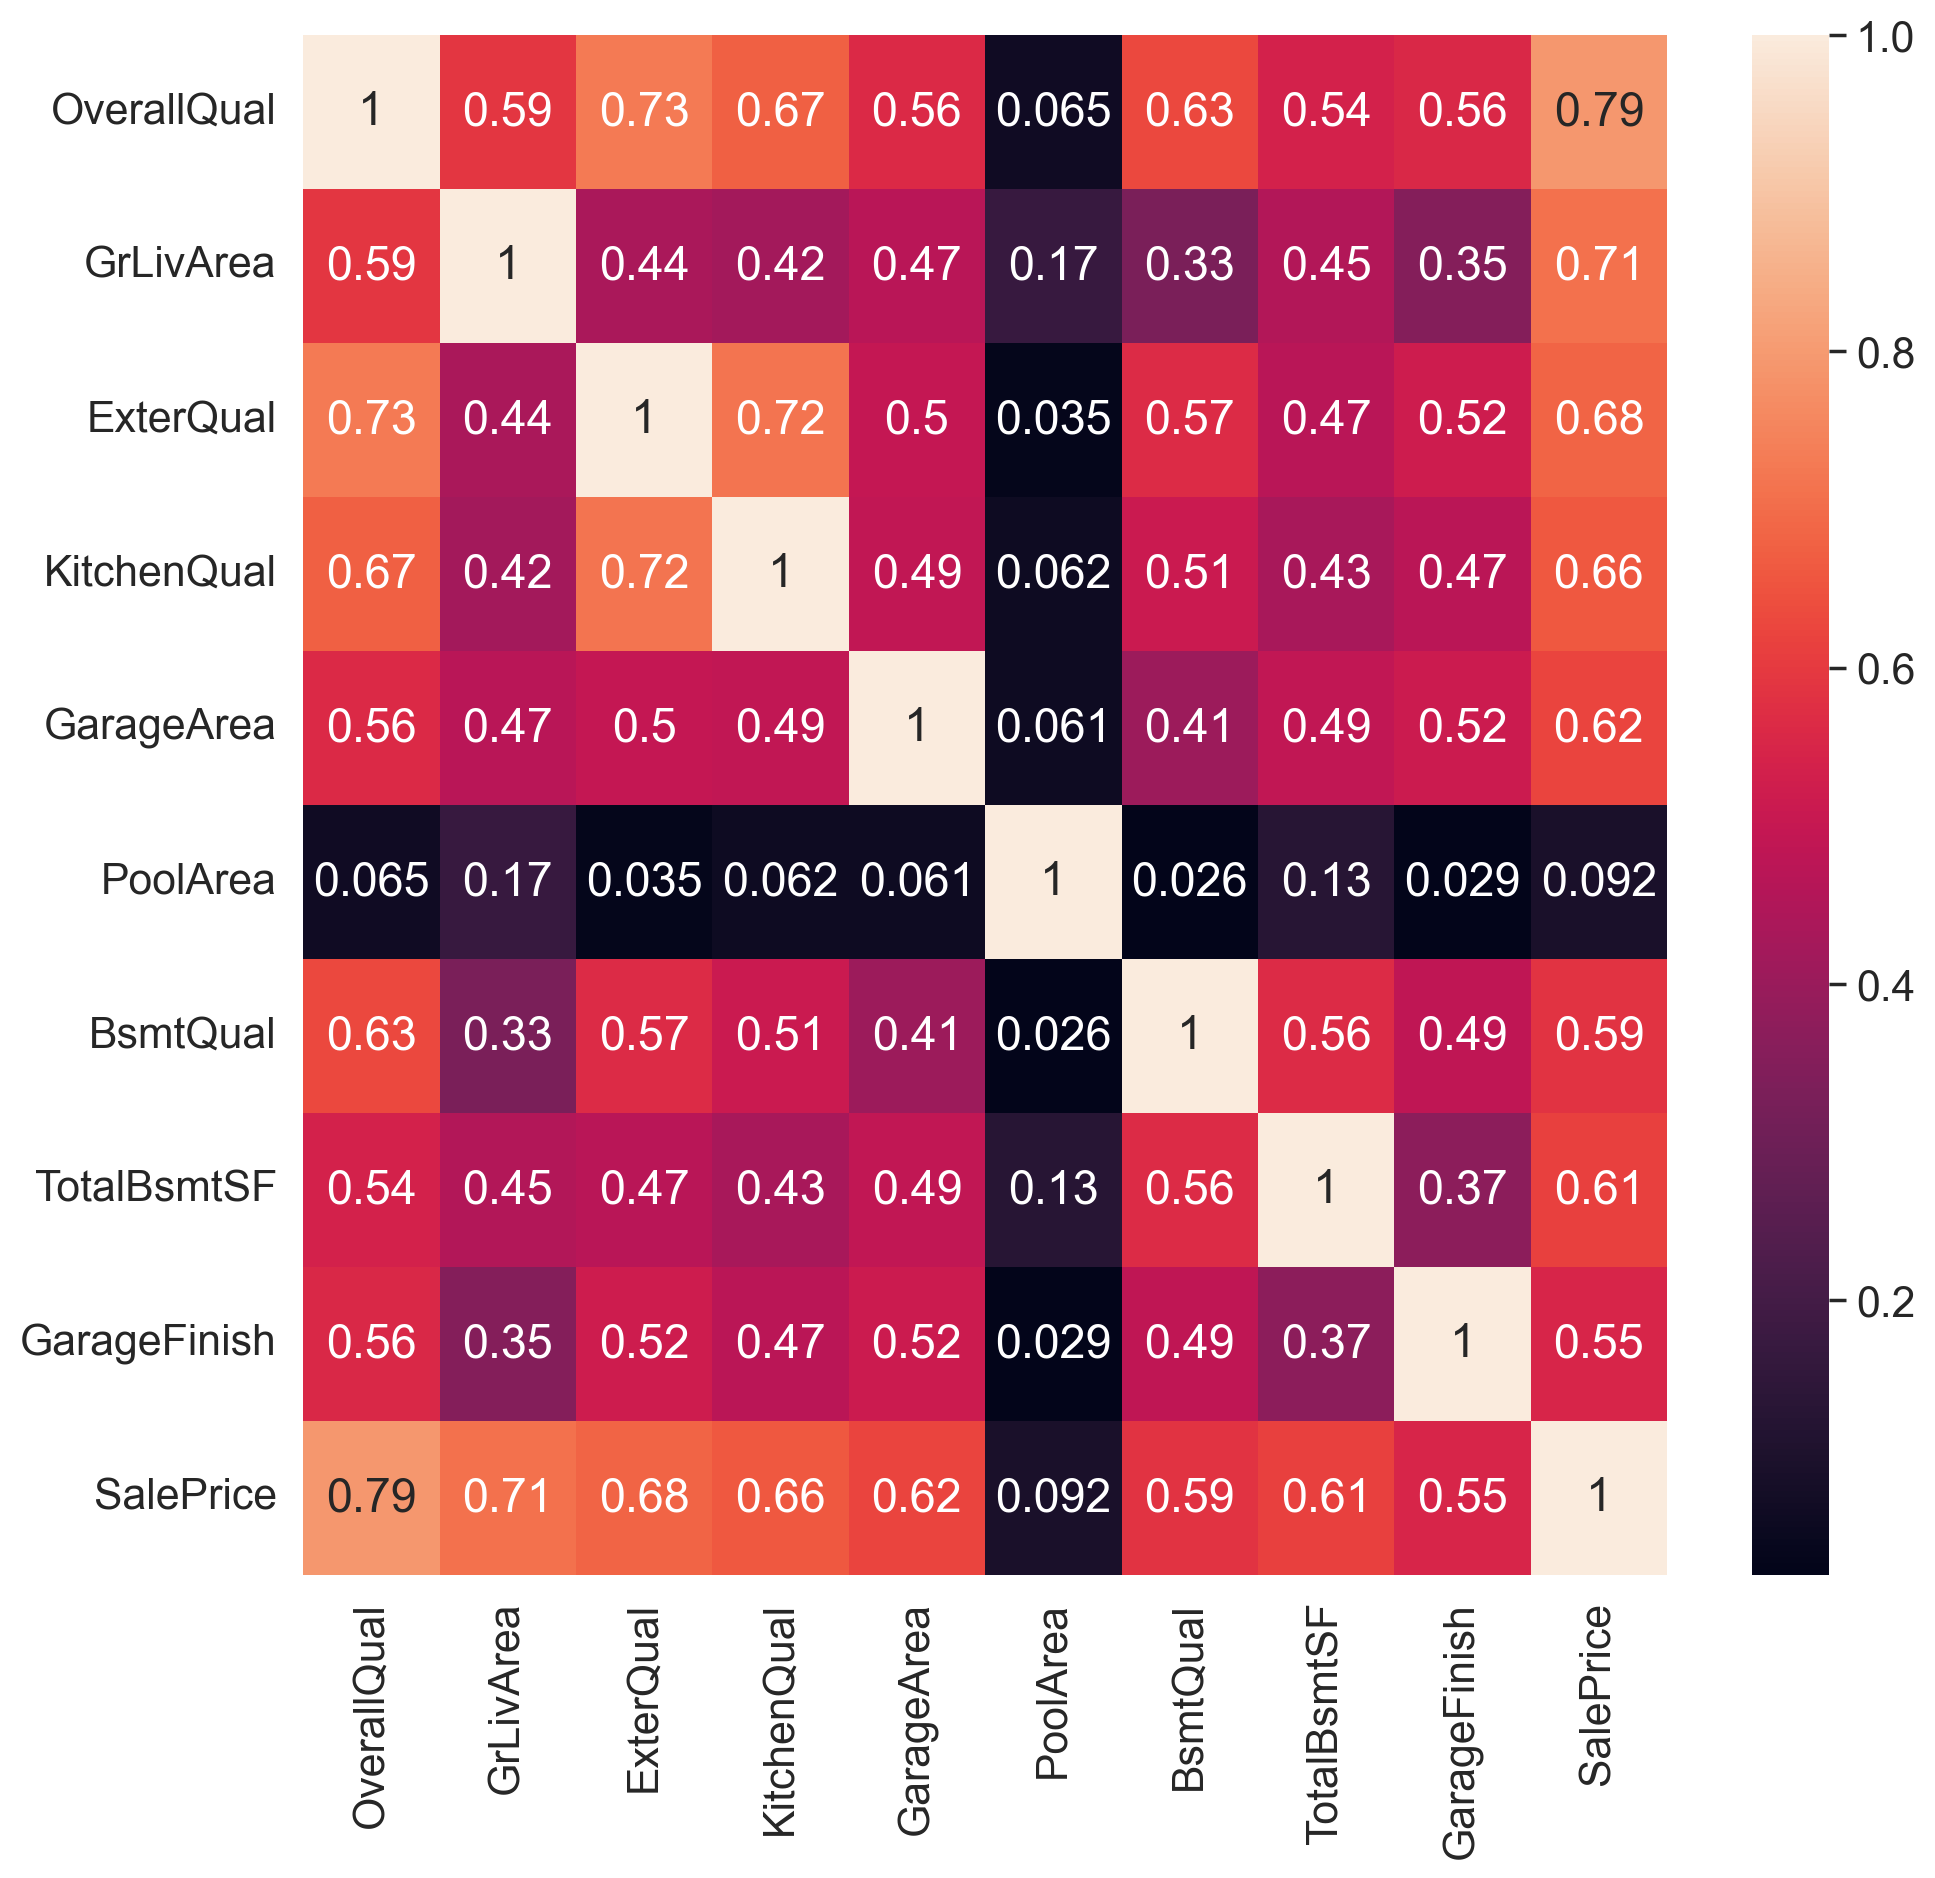

In [71]:
plt.figure(figsize=(11, 10))
sns.heatmap(filtered_df.corr(), annot=True)
plt.show()

Изучите карту и сделайте по ней выводы о зависимости в данных ($|r_{XY}| > 0.9$). А чем плохи зависимые признаки? Для ответа на последний вопрос напишите чему равно аналитическое решение задачи регрессии.

**Ответ:** линейно зависимых признаков нет

Удалите, если требуется, один из двух скоррелированных признаков в ячейке ниже.

Давайте подробнее изучим взаимодействие признаков. Построим матрицу. На диагонале $a_{ii} = d_i$ этой матрицы построим гистограммы для $i$-го признака. На остальных позициях $a_{ij}$ будут располагаться scatterplot в осях признака $i$ по $x$ и признака $j$ по $y$. Для этого можно использовать метод из pandas ``pd.plotting.scatter_matrix``.

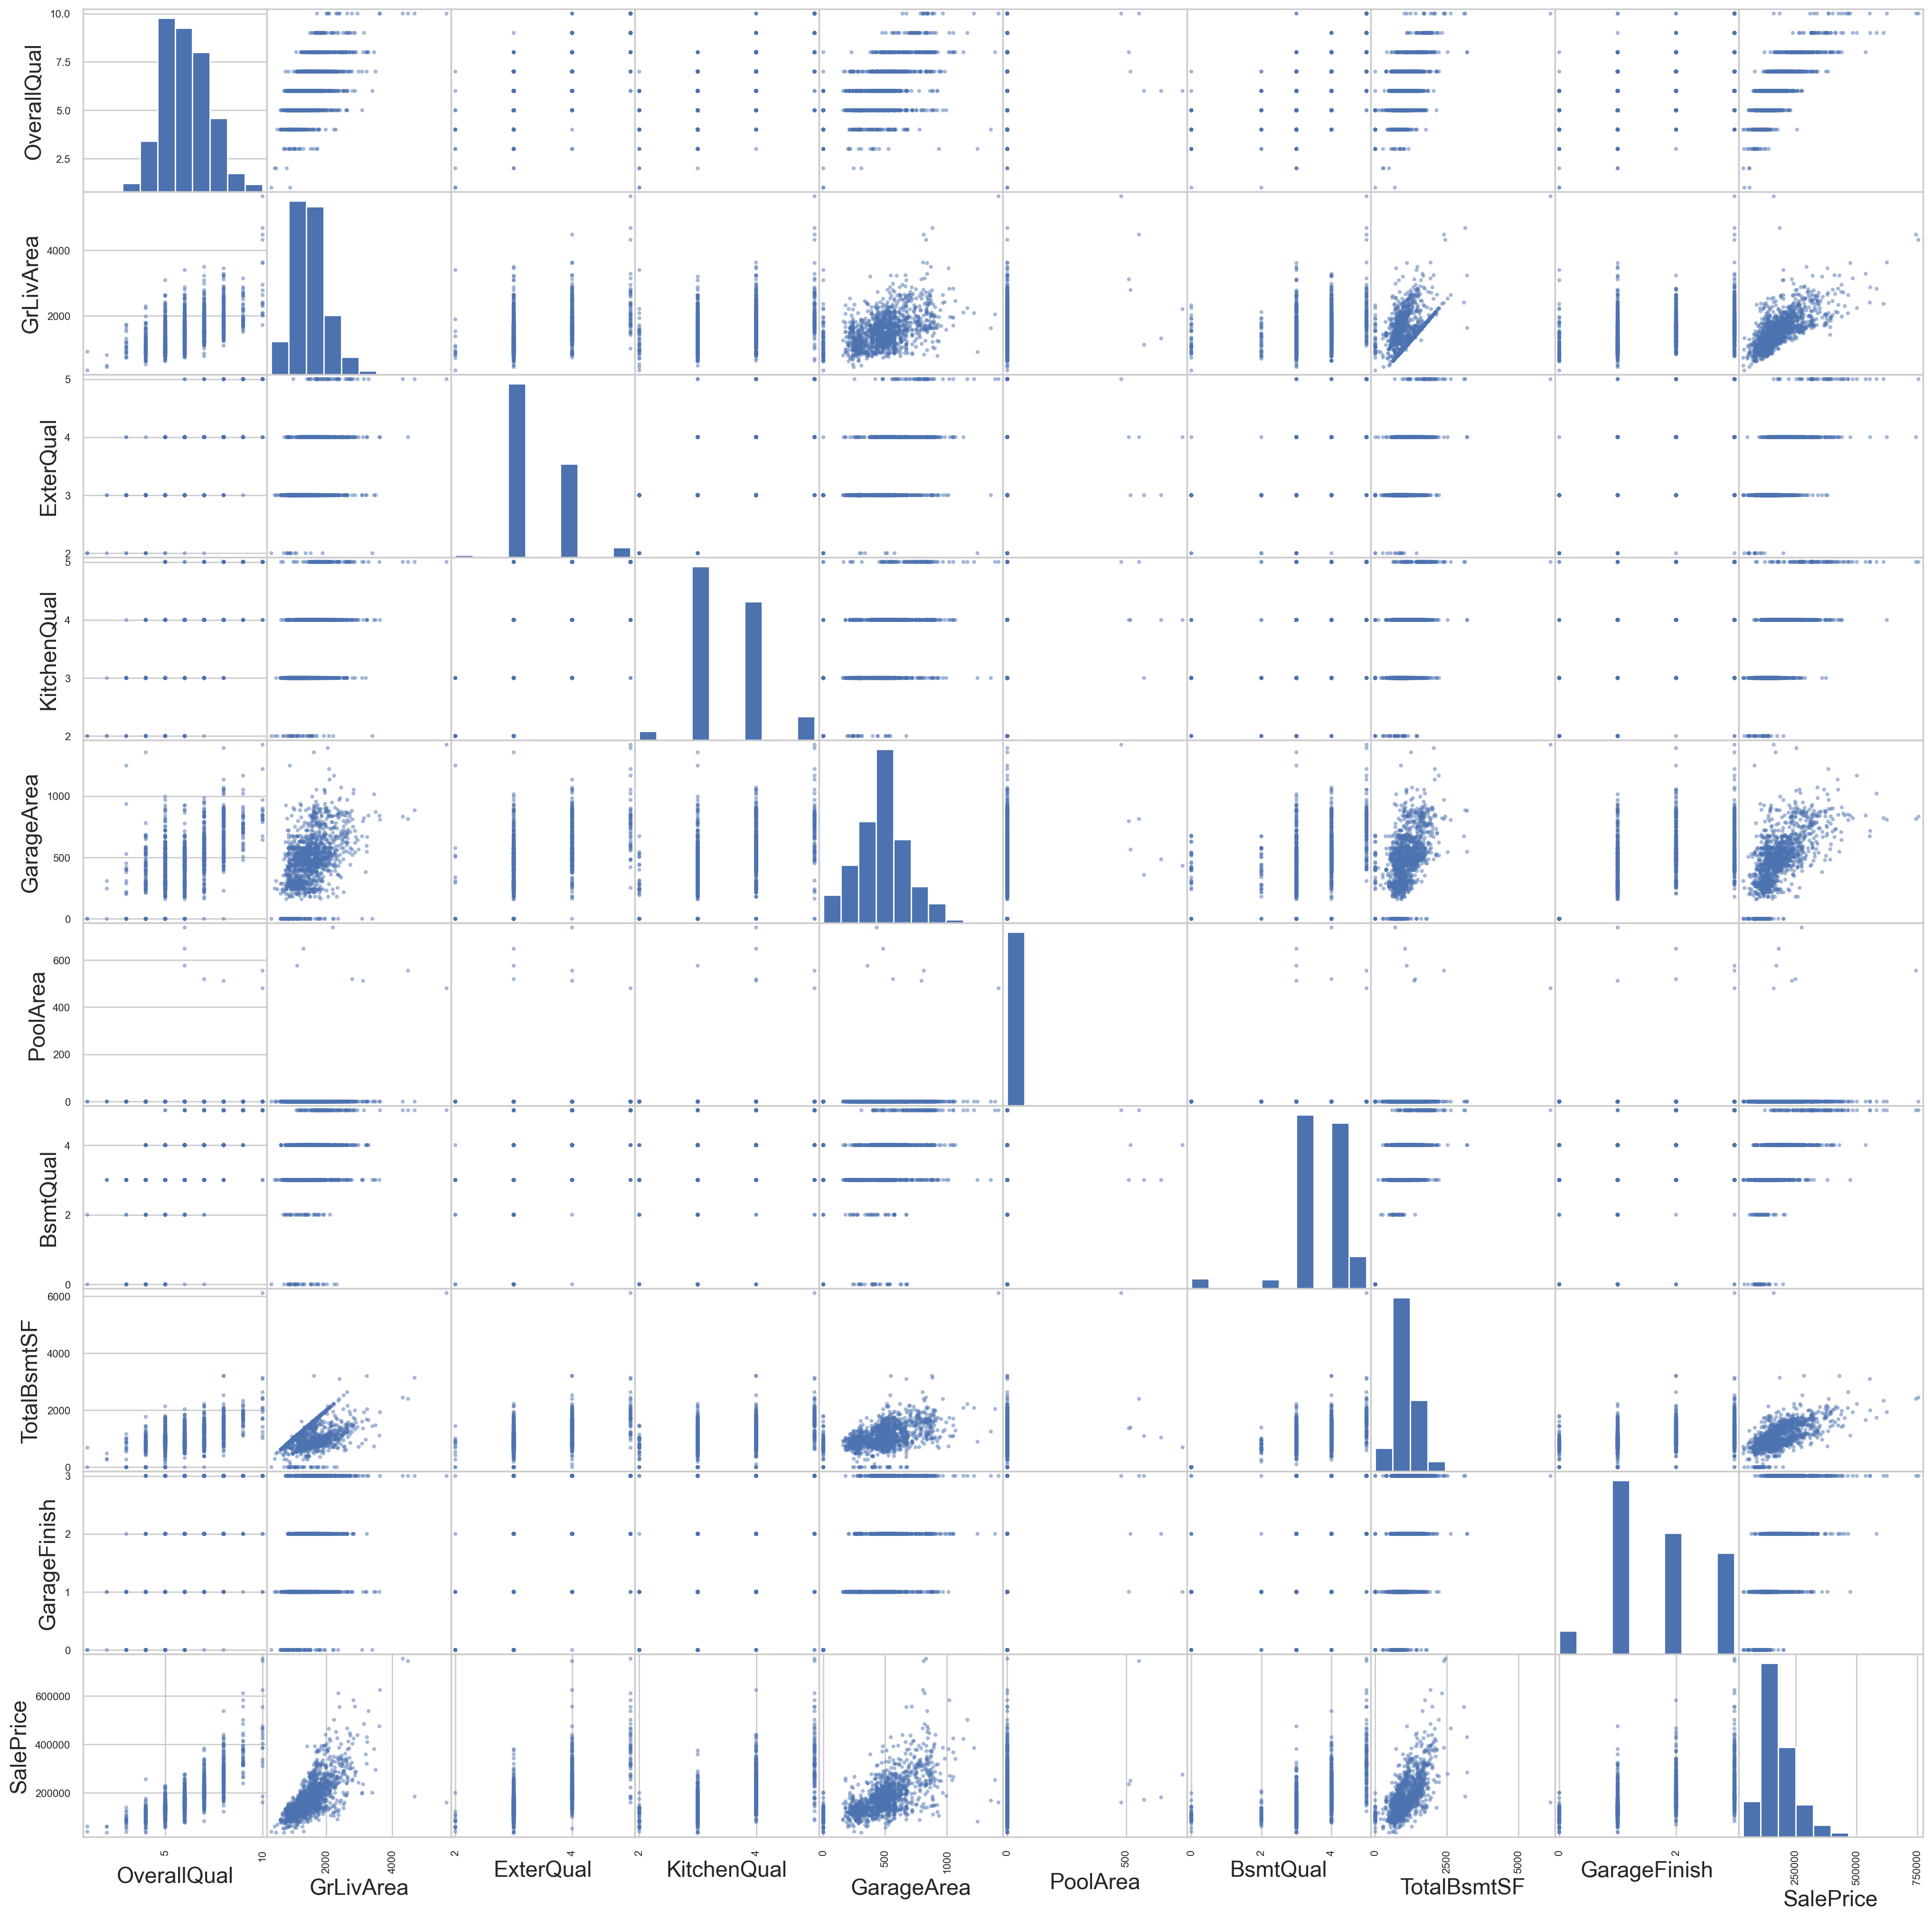

In [74]:
pd.plotting.scatter_matrix(filtered_df, figsize=(25, 25))
plt.show()

Сделайте вывод о данных. Опишите, нужна ли регуляризация и почему?

### Как пользоваться линейными моделями

Как можно догадаться, на практике никто не пишет заново свои линейные модели. Для машинного обучения часто используют библиотеку scikit learn, для аналитики statsmodels. С первой вы познакомитесь (или уже познакомились) на курсе по ML, мы же сконцентрируемся на второй.

Итак, библиотека statsmodels состоит из множества реализованных критериев и, как ни странно, статистических моделей. Основным плюсом является то, что нам не нужно реализовывать критериии вручную, все сделано за нас (это не значит что думать не надо!).

Начнем с линейной модели: для того, чтобы ее создать понадобится лишь одна строка.  Как видно в ячейке ниже мы задаем формулу того, какую модель мы хотим получить. В данном случае мы хотим предсказать ``SalePrice`` по взвешенной сумме из остальных признаков.

In [75]:
formula = "SalePrice ~ " + " + ".join(useful_columns[:-1])

print(formula)

SalePrice ~ OverallQual + GrLivArea + ExterQual + KitchenQual + GarageArea + PoolArea + BsmtQual + TotalBsmtSF + GarageFinish


Теперь эту формулу мы просто передаем в модель, а так же подаем ей данные. В формуле написаны имена колонок из ``filtered_df``.

In [76]:
simple_model = smf.ols(formula, data=filtered_df)

fitted_simple_model = simple_model.fit()

print(fitted_simple_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     581.5
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:58:42   Log-Likelihood:                -17429.
No. Observations:                1460   AIC:                         3.488e+04
Df Residuals:                    1450   BIC:                         3.493e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.483e+05   6394.344    -23.185   

После работы кода должна, выше должна получится примерно такая картинка:

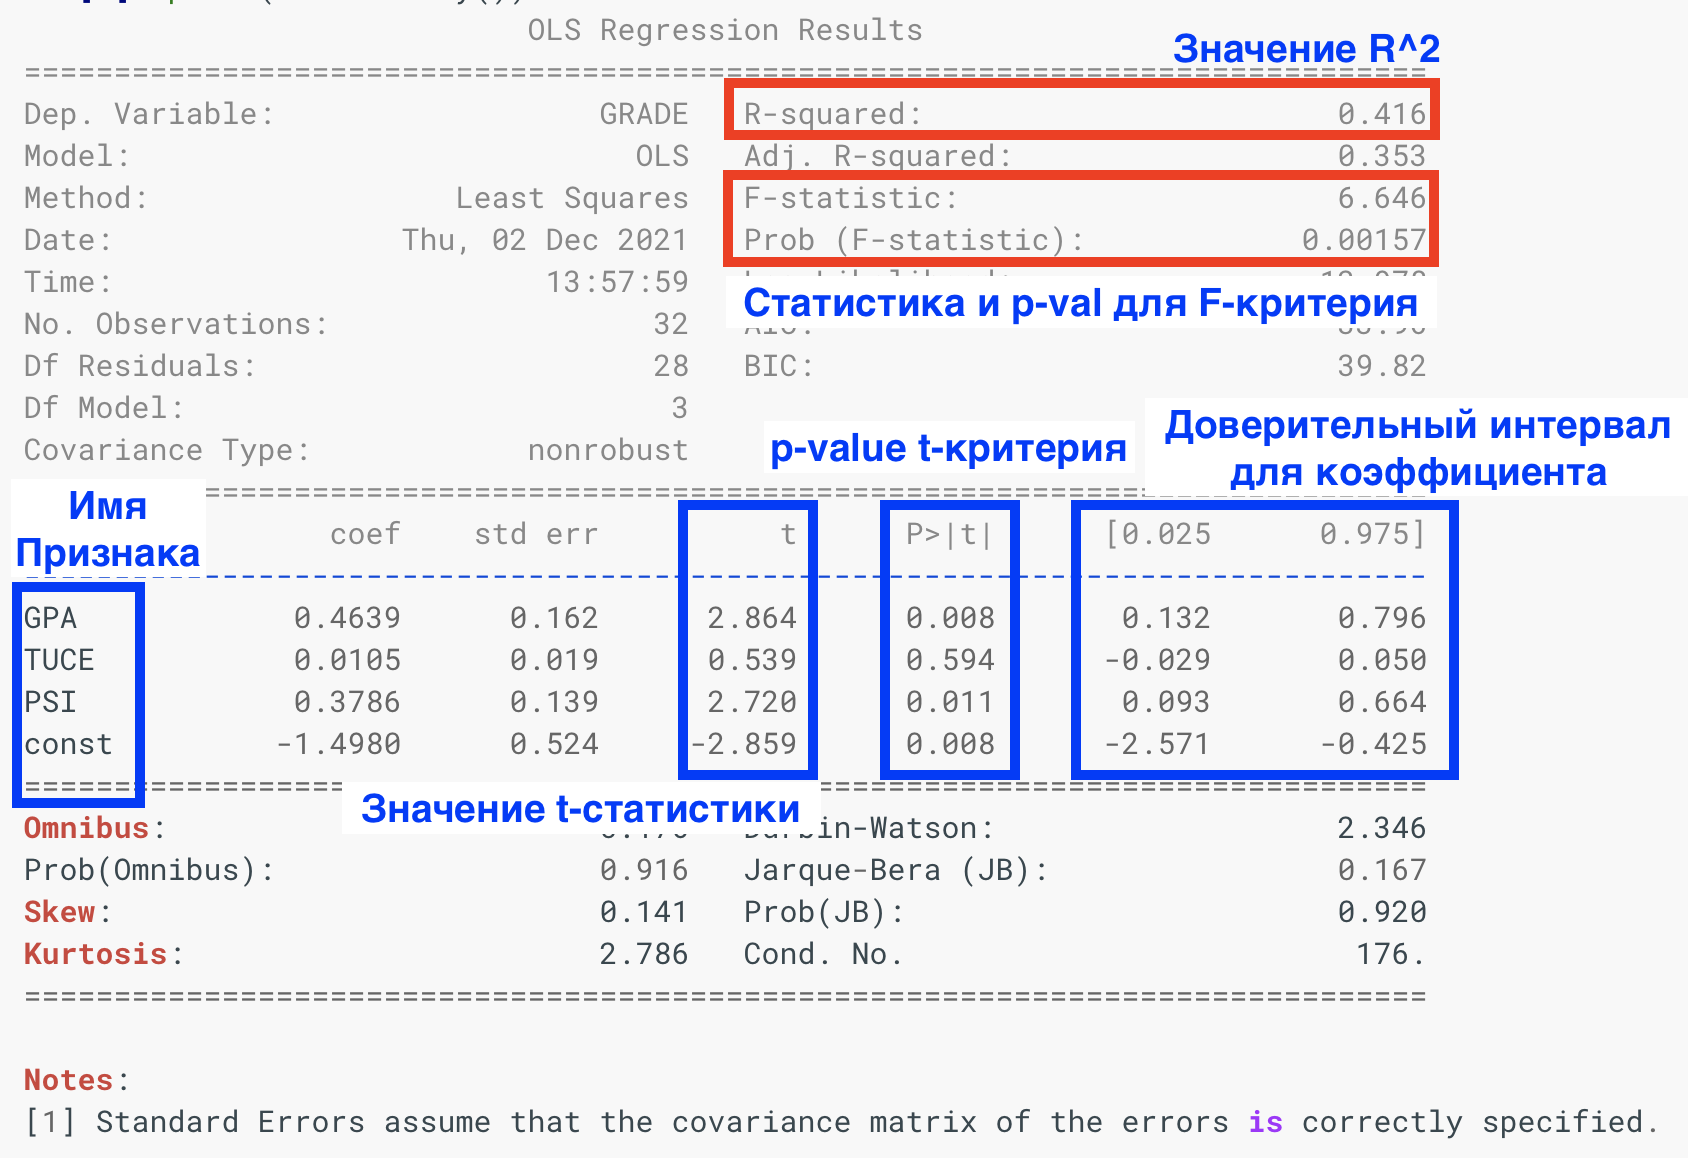


В примере название фичей намеренно изменены.

Можно заметить, что сверху располагается уже известный вам $R^2$. Далее чуть ниже располагются статистика и p-value (уровень достигаемой значимости) для F-критерия. Проверяется гипотеза о том, что наша модель работает лучше константы.

В мини-таблице есть проверка каждого признака на его значимость в модели с помощью t-критерия. Проверяется гипотеза о том, что модель без этого признака описывает не хуже, чем модель с этим признаком. Если значение p-value низкое, то, вероятно, признак статистически важен для модели. Таким образом можно осуществлять отбор признаков.




### Гетероскедастичность ошибки

Оценка, полученная с помощью гауссовской линейной модели будет справдлива лишь при выполнении условия гомоскедастичности остатков. Для проверки на гомоскедастичность часто используют критерий Бройша — Пагана. Мы не будем вдаваться в детали и доказательство того, что критерий валидный и работает правильно. Итак, критерий Бройша — Пагана проверяет нулевую гипотезу о гомоскедастичности распределения данных против альтернативы, то есть гетероскедастичности. Если нулевая гипотеза отвергается то можно сказать, что данные распределены ГЕТЕРОскедастично. Мы этого не хотим.

Критерий реализован с помощью функции ``sms.diagnostic.het_breuschpagan``. Документацию можно найти [здесь](https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.het_breuschpagan.html).

Остатки модели можно из поля ``fitted_model.resid``, а параметры из ``fitted_model.model.exog``.

Нас интересует p-value для множителя Лагранжа.

В ячейке ниже получите уровень достигаемой значимости для критерия Бройша — Пагана.

In [77]:
p_val_het = sms.diagnostic.het_breuschpagan(resid=fitted_simple_model.resid,
                                            exog_het=fitted_simple_model.model.exog)[1]

print(f"p-value simple: {p_val_het}")

p-value simple: 5.431361130975639e-95


Отвергается ли гипотеза о гомоскедастичности остатков (определение из будущего: гипотеза отвергается, если pvalue < 0.05 и это значит, что её утверждение полагается неверным)? Что это означает?

**Ответ:** p-значение меньше парога, а значит гипотеза о гомоскедастичности опровергается. Тогда ошибка распределена гетероскедастично, а значит оценки методом МНК, которые мы получили, неэффективны.

В случаях, когда распределения остатков не является гомоскедастичном оценка по-прежнему остается несмещенной, однако стоит сделать некоторую поправку, на более высокую дисперсию. Поэтому значения F-критериев и t-критериев для коэффициентов стоит пересмотреть. Для таких случаев существует достаточно много различных поправок, одно из семейств таких поправок называется поправки Уайта на гетероскедастичность. Ниже мы попробуем использовать одну из поправок.

Для этого, в ячейке ниже, обучите линейную модель, но на этот раз передайте в метод ``.fit`` аргумент ``cov_type="HC1"``.

Получите summary для такой модели.

In [78]:
fixed_model = smf.ols(formula,data=filtered_df)
fitted_fixed_model = fixed_model.fit(cov_type="HC1")
print(fitted_fixed_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     266.7
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          5.44e-300
Time:                        21:01:28   Log-Likelihood:                -17429.
No. Observations:                1460   AIC:                         3.488e+04
Df Residuals:                    1450   BIC:                         3.493e+04
Df Model:                           9                                         
Covariance Type:                  HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.483e+05   9507.281    -15.594   

Проанализируйте результаты. Как изменились p-value для t-критериев? Как изменился коэффициент $R^2$?

**Ответ:** Коэфициент R^2 такой же. Мы видим низкое р-значение F-критерия, тогда опровергается гипотеза о том, что модель работает лучше константной. Если мы посмотрим t-критерии для TotalBsmtSF and PoolArea, то увидим, что они уменьшились.

Теперь мы действительно можем оценивать то, насколько важен тот или иной признак. Давайте отфильтруем наш датасет и оставим в нем только значимые признаки на уровне значимости $\alpha = 0.05$. (используйте t-критерий).



In [79]:
features_to_filter = ['PoolArea']
filtered_columns = useful_columns
for i in features_to_filter:
    filtered_columns.pop(useful_columns.index(i))

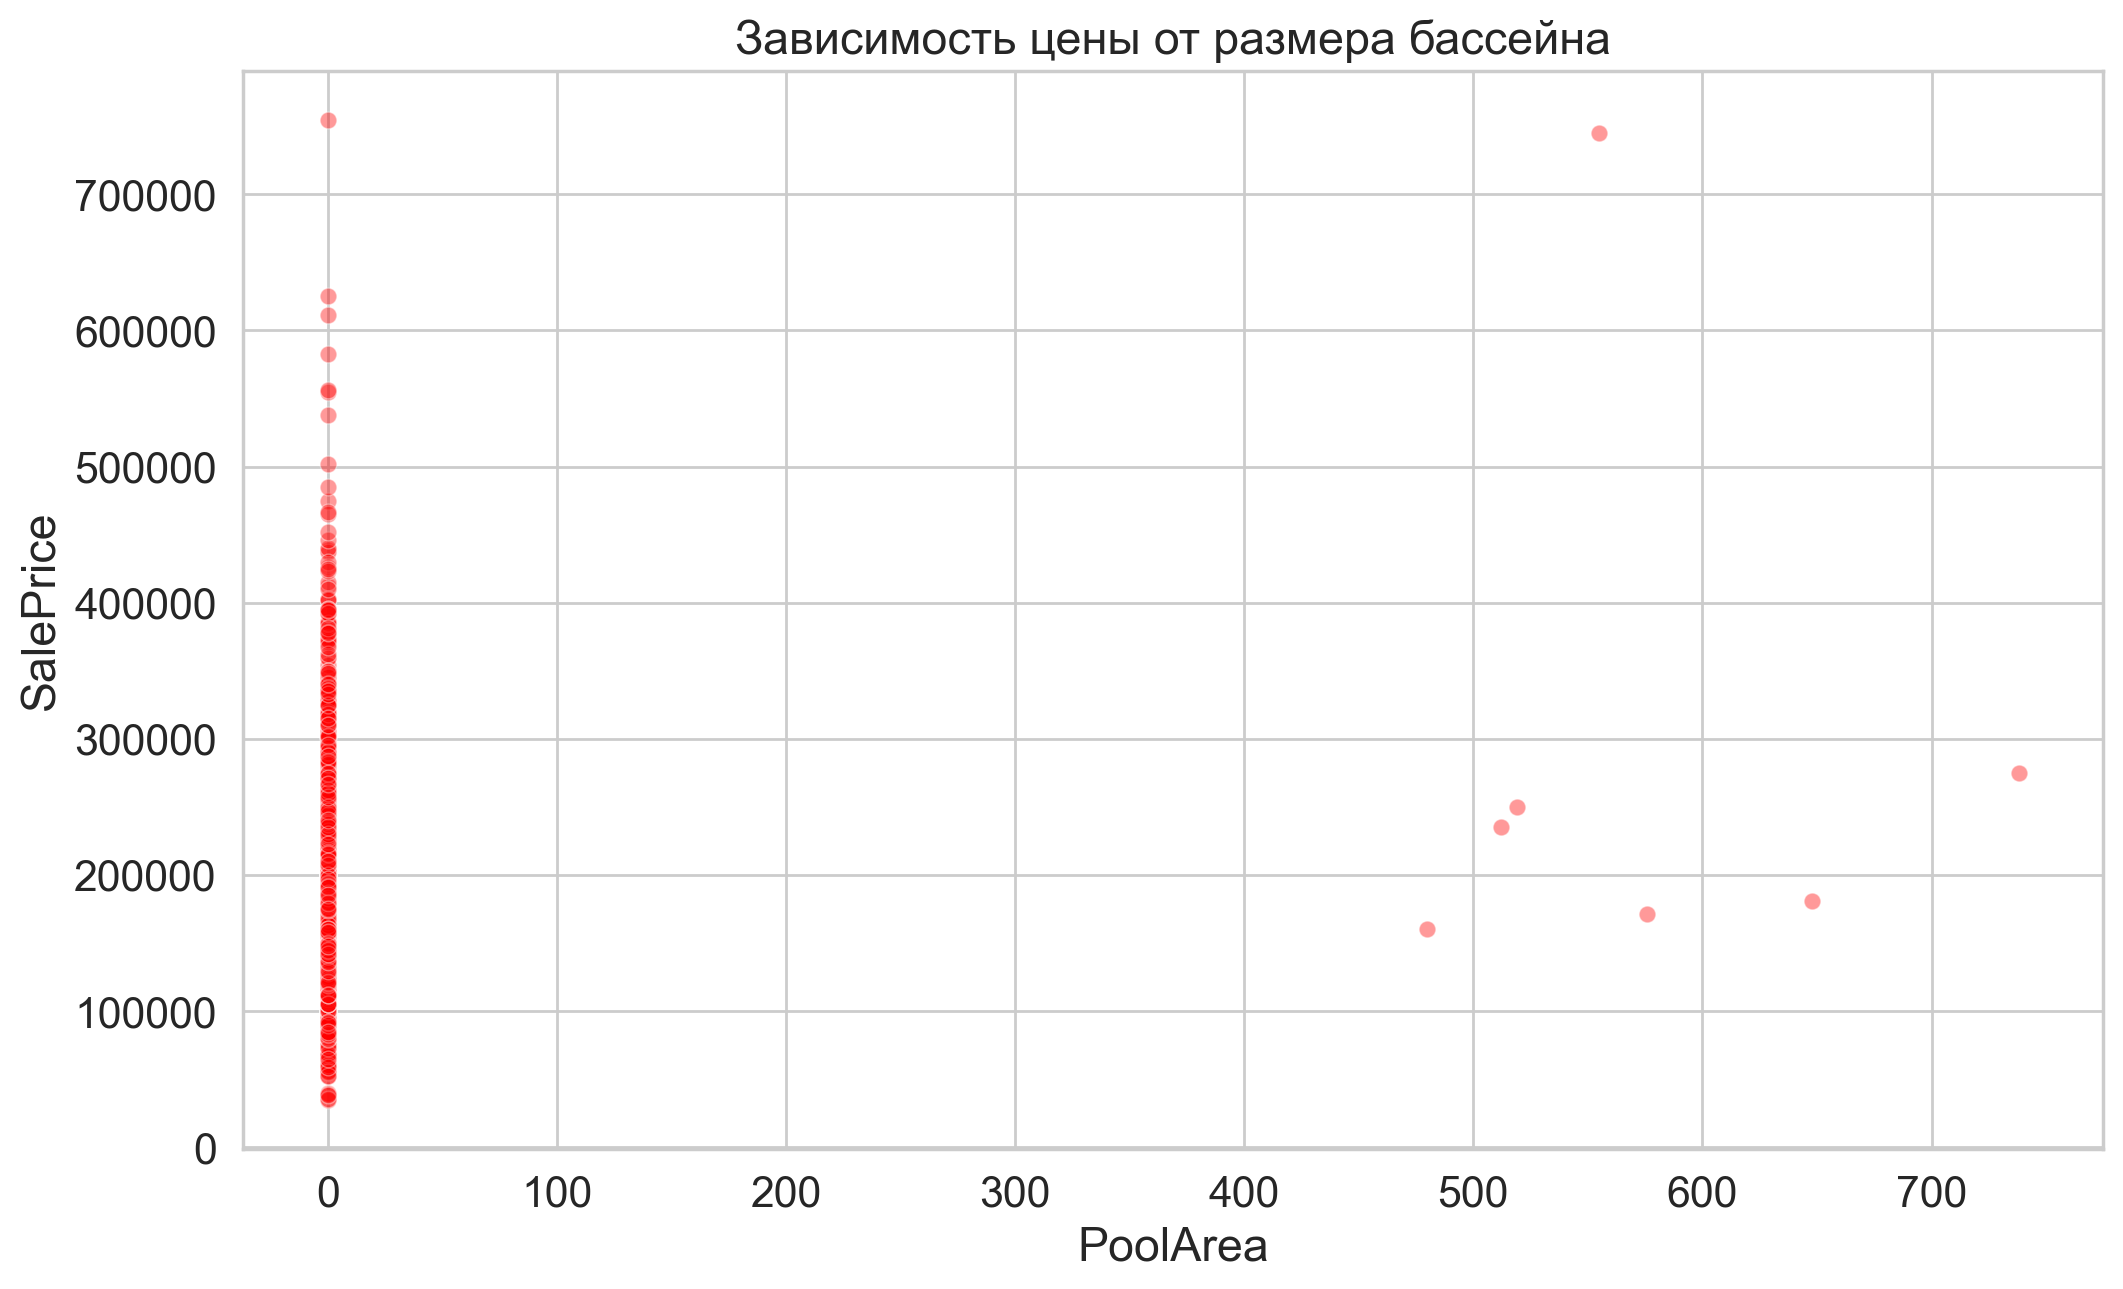

In [80]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=filtered_df, x='PoolArea', y='SalePrice', alpha=0.4, color="red")
plt.title("Зависимость цены от размера бассейна")
plt.show()

Какие признаки оказались не значимы и почему?

**Ответ:** Площадь бассейна, как мы видим, не значимый признак, так как p-значение для z-критерия > 0.05.

Теперь снова обучим новую модель только на значимых признаках и получим summary. Не забудьте про поправку Уайта!

In [81]:
fitted_filtered_model = smf.ols("SalePrice ~ " + " + ".join(filtered_columns[:-1]), data=filtered_df).fit(cov_type="HC1")
print(fitted_filtered_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     300.1
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          4.12e-301
Time:                        21:07:36   Log-Likelihood:                -17429.
No. Observations:                1460   AIC:                         3.488e+04
Df Residuals:                    1451   BIC:                         3.492e+04
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -1.48e+05   9707.685    -15.247   

Как изменился коэффициент $R^2$? Всегда ли бОльший $R^2$ говорит о правильной модели? Расскажите о своих рассуждениях!

**Ответ:** Коэффициент R^2 не изменился, но большой коэффициент - не означает, что модель хорошая, т.к. она может быть и переобученной, а метрика даст хороший коэффициент. Эта метрика показывает какую долю зависимой переменной объяснют другие признаки, другими словами это показывает то, насколько хорошо модель обучается.

### Преобразование целевого признака

Обратим свое внимание на целевую переменную. Ниже постройте гистограммы для признака ``SalePrice``. А так же для логарифма от ``SalePrice``. Сделайте это на разных картинках. Можно использовать subplot.

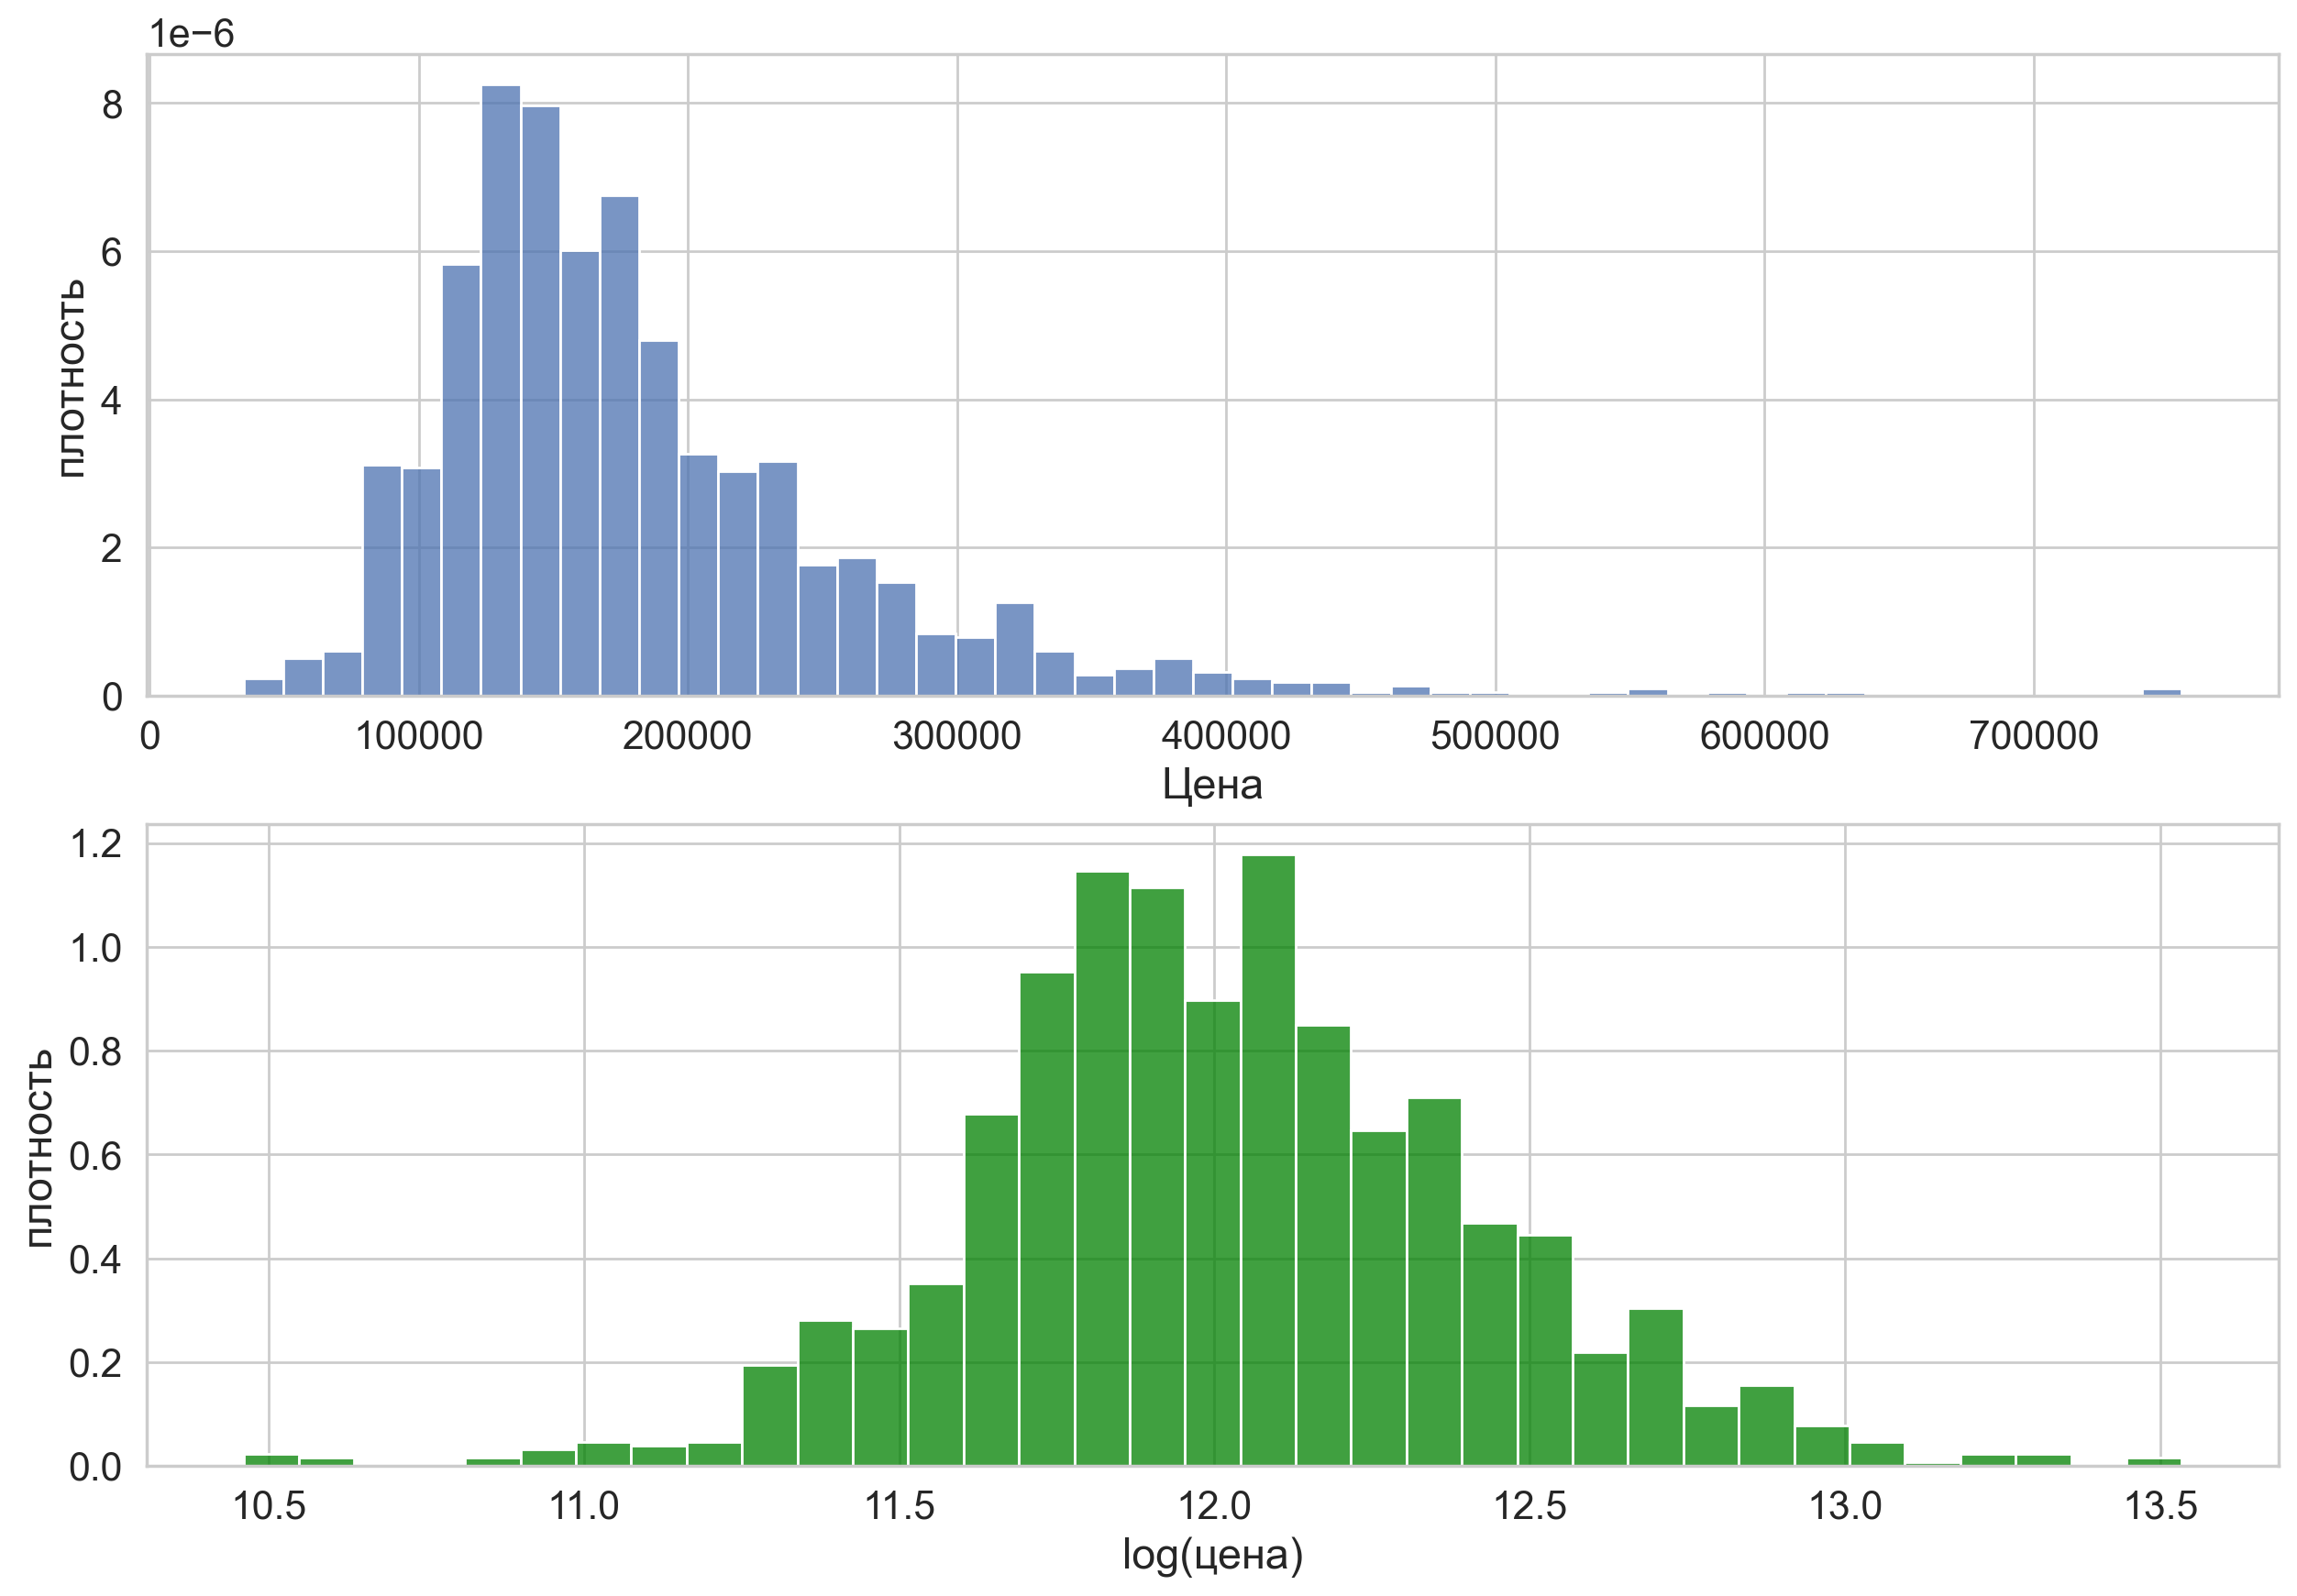

In [83]:
filtered_data = filtered_df[filtered_columns]

fig, axes = plt.subplots(2, 1, figsize=(15,10))
sns.histplot(ax=axes[0],data=filtered_data['SalePrice'],stat='density')
sns.histplot(ax=axes[1],data=np.log(filtered_data['SalePrice']),stat='density', color="green")

axes[0].set_xlabel('Цена')
axes[0].set_ylabel('плотность')

axes[1].set_xlabel('log(цена)')
axes[1].set_ylabel('плотность')
plt.show()

Какой из графиков выглядит более "Гауссовским"?

**Ответ:** Плотность логорифма от Цены.

Теперь давайте снова посмотрим на распределение остатков от линейной модели. Начертим qqplot для нормального распределения и гистограмму остатков.

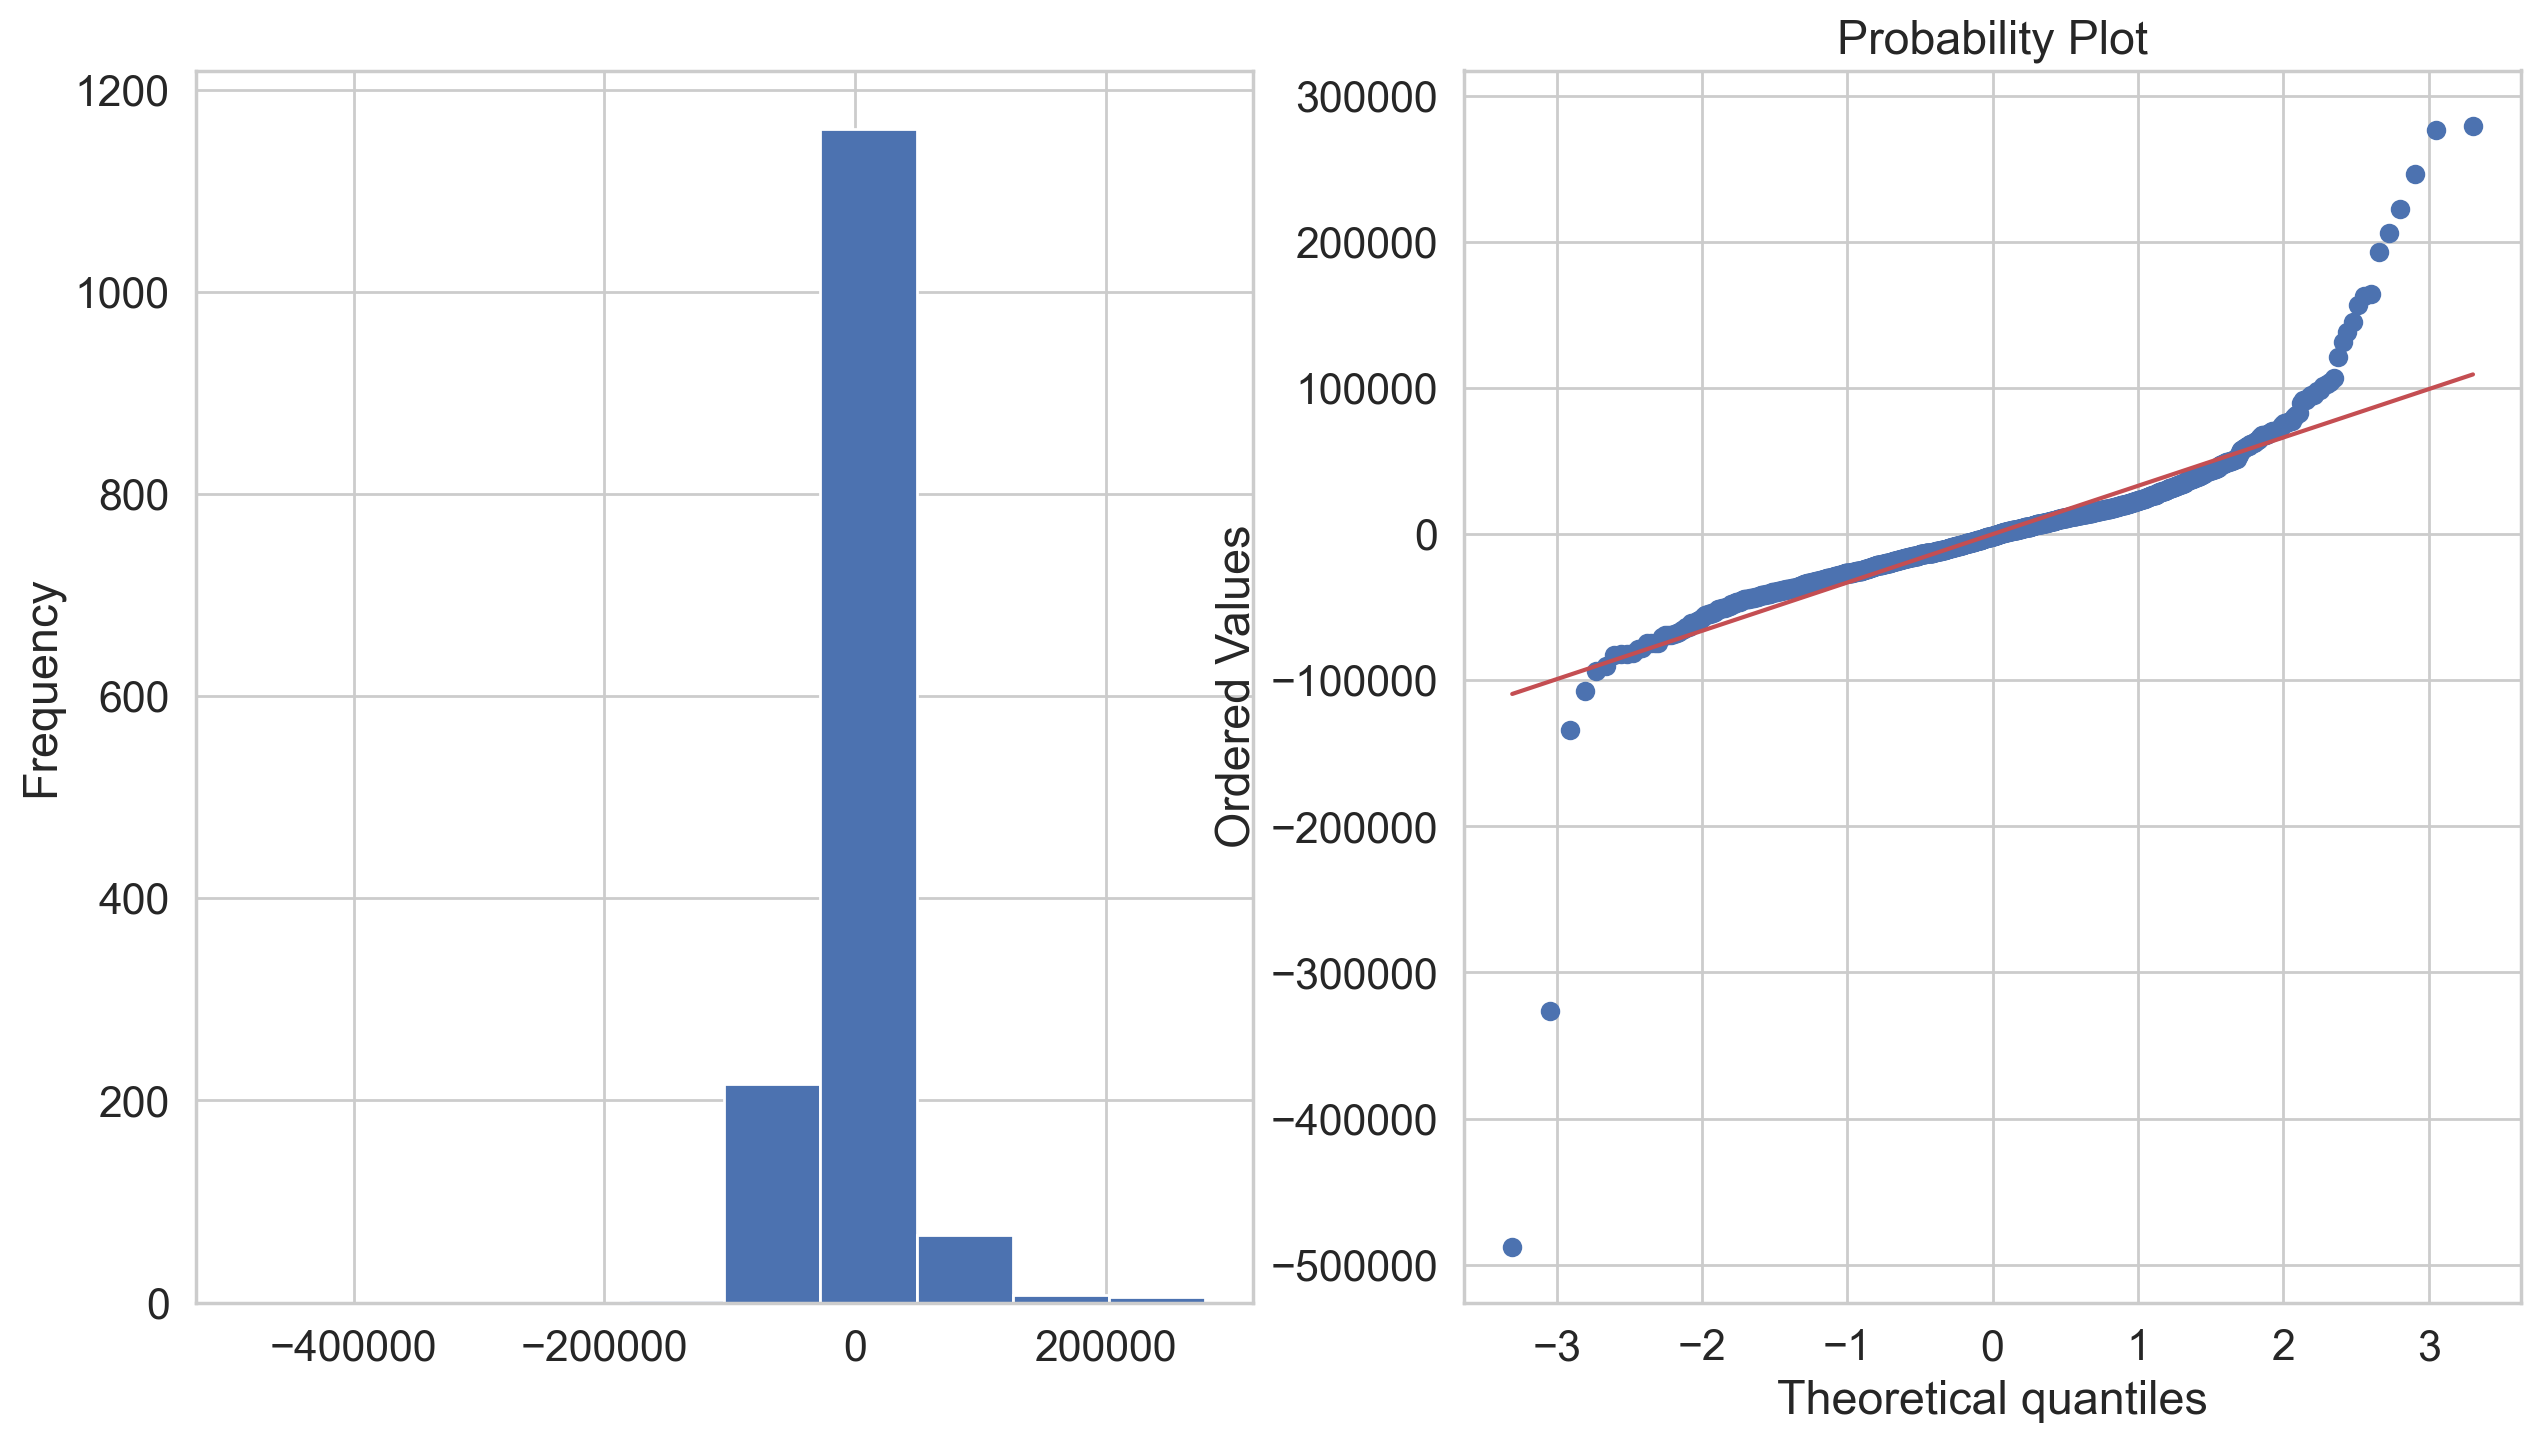

In [85]:
plt.figure(figsize=(15, 8))

plt.subplot(121)
fitted_filtered_model.resid.plot.hist()

plt.subplot(122)
sps.probplot(fitted_filtered_model.resid, dist="norm", plot=plt)

plt.show()

Как вы считаете, можно ли сказать, что распределение остатков это нормальное распределение?

**Ответ:** Мы видим на графике подобие буквы S, а значит пик более острый, чем в нормальном распредлении, а значит с большой долей веротности это не нормальное распредлеение.

Давайте обучим модель предсказывать не SalePrice, а ее логарифм. Для этого снова обновим формулу для модели. Прелесть формул в том, что в них можно использовать операции из numpy. Например можно искать зависимость не от ``PoolArea``, а от ее квадрата, то есть ``np.power(PoolArea, 2)``. Достаточно просто добавить в формулу ..." + np.power(PoolArea, 2)" и все заработает!

В ячейке ниже обучите модель предсказывать логарифм SalePrice. Получите summary этой модели.

In [87]:
fitted_log_model = smf.ols('np.log(SalePrice) ~ ' + ' + '.join(filtered_columns[:-1]), data=filtered_data).fit()
print(fitted_log_model.summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     798.0
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:17:17   Log-Likelihood:                 499.69
No. Observations:                1460   AIC:                            -981.4
Df Residuals:                    1451   BIC:                            -933.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.4070      0.030    350.626   

Как изменился коэффициент R^2? Модель лучше стала понимать данные?

**Ответ:** Он немного увеличился, поэтому можно скорее всего можно сказать, что да, модель стала немного лучше понимать данные.

Постройте графики, аналогичные тем, что встретились нам на две ячейки выше (qqplot и гистограмму остатков). Но на этот раз для модели, предсказывающией логарифм.

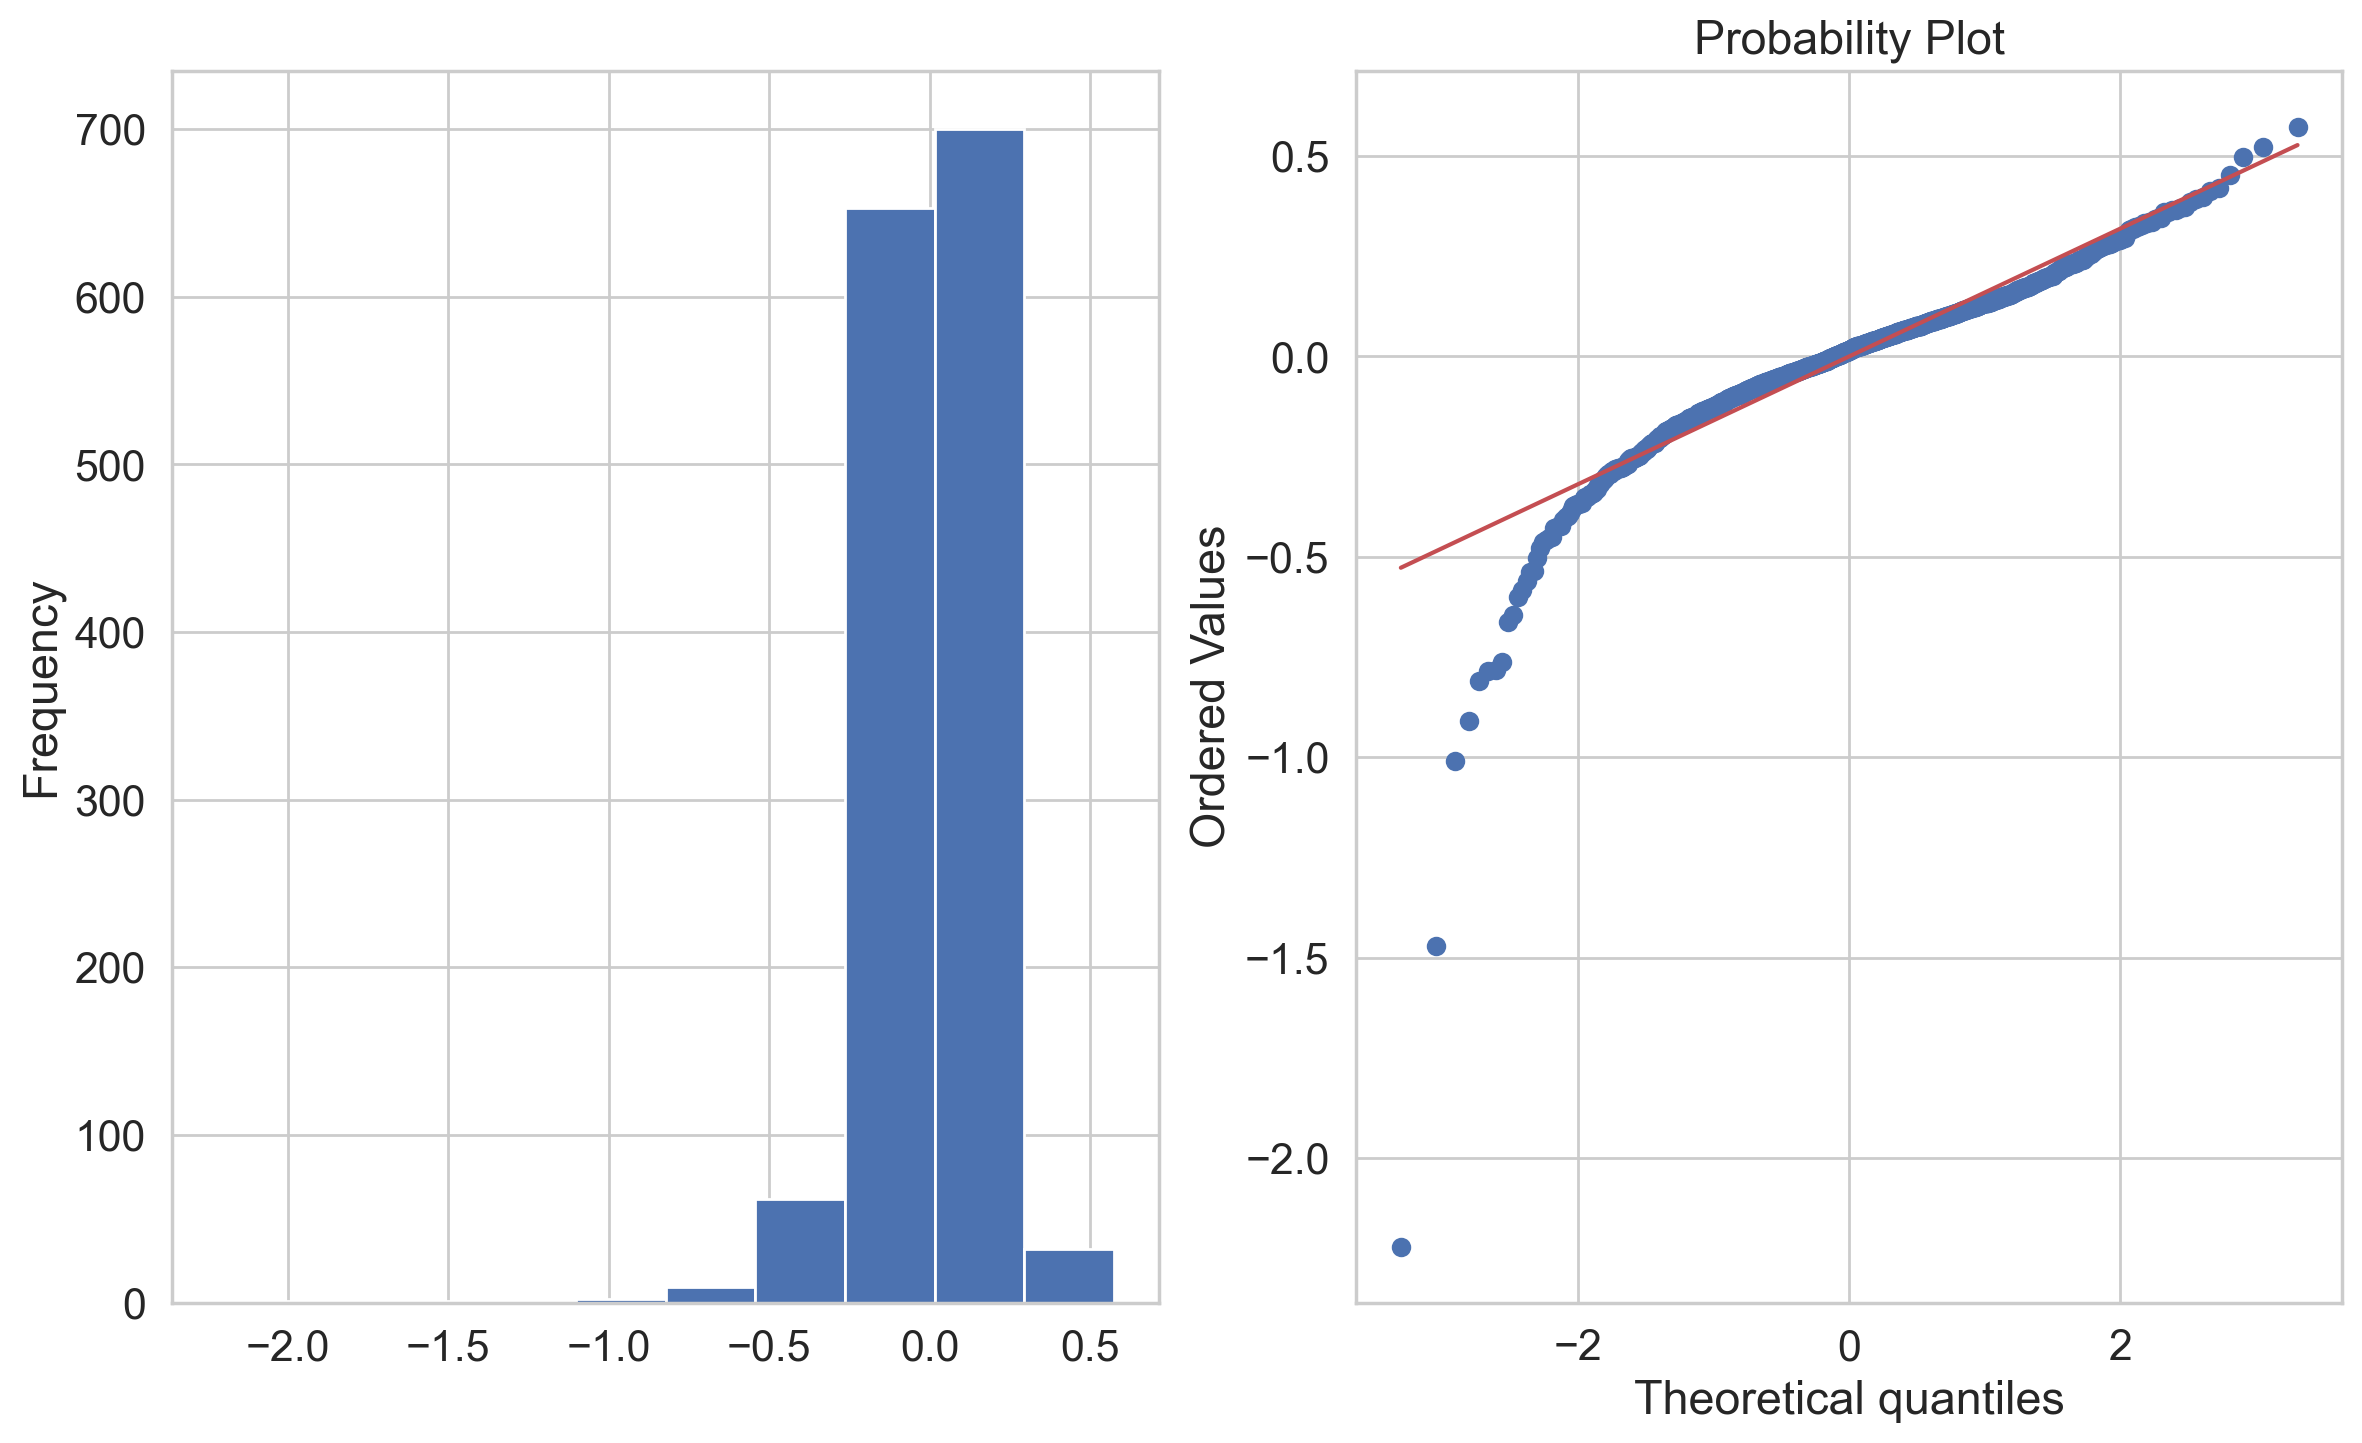

In [88]:
plt.figure(figsize=(14, 8))

plt.subplot(121)
fitted_log_model.resid.plot.hist()

plt.subplot(122)
sps.probplot(fitted_log_model.resid, dist="norm", plot=plt)

plt.show()

Как вы считаете, стоит ли предсказывать логарифм от цены? В каких случаях это полезно?

**Ответ:** Из нашего эксперемента, мы видим, что если мы предсказываем логорифм, то распрделение намного больше похоже на нормальное, а мы как раз имеем предположение, что наш таргет признак имеет нормлаьное распредление. Также мы выяснили, что модель в таком случае лучше понимает данные. По итогу мы можем сказать, что в случае, когда логорифм от таргета имеет более номальное распределние, то лучше предсказывать логорифм от таргета, чем просто таргет.

## Бонусная часть (10 баллов)

Подойдём к задаче регрессии с байесовской точки зрения. Полезно изучить разделы 8.1, 8.2 конспекта Д.П.Вектрова (https://vk.com/doc126754362_500465695?hash=uU7RYUtCmrntB7ynduiZlYgZuR5C4oSnXqB5nXW0DEk&dl=votNcsozZKYk4ZLO546dYTZd17B3eHok2xSVQP6F6ic)

Только в начале дочитайте задание, а потом лезьте в конспект.

Мы Вам предлагаем увидеть, как при помощи байесовского подхода выбрать важные признаки регрессионной модели. Рекомендуем проделать выкладки без "подглядывания" в конспект.

1) Запишите байесовскую постановку задачи регрессии. Не забудьте про априорное распределение -- регуляризацию (пусть она для всех компонент одинаковая). Регуляризовать будем нормальным распределением, более того считать его компоненты независимыми (матрица ковариаций будет диагональна)

2) Каким будет аналитическое решение, если бы мы реализовывали "байес для бедных"? Какую роль играет регуляризация?

3) Теперь, когда Вы выяснили роль регуляризации давайте вместо диагональной матрицы с одинаковыми значениями на диагонали в качестве априорного распределения возьмём разные значения. Как изменится решение? Что произойдёт с теми признаками, у которых априорная дисперсия высокая? А низкая?

4) В вариационном байесовском выводе у Вас появился интересный объект в знаменателе -- интеграл по всему пространству параметров от регуляризированного правдоподобия. Это называется *обоснованностью* параметрической модели. Чем она выше -- тем лучше заданное семейство распределений описывает Ваши данные.

Прочитайте статью на википедии о бритве Оккама и критерии фальсифицируемости Поппера и ещё раз посмотрите на знаменатель. Порассуждайте о том, почему более обоснованные модели выше.

**Ваш философский ответ:**

А теперь откройте главу 8 конспекта Ветрова и изучите алгоритм максимизации обоснованности.

Напишите его.

Изучите дисперсии, которые получатся после 30 итераций (или сколько Вам понадобится для сходимости). Подумайте, почему алгоритм счёл одни признаки полезнее других. Визуализируйте распределение признака и его дисперсию. Сделайте выводы.

**Вывод:**